# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задача:** Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузка данных
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal='.')

display(data.head())
data.info();

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

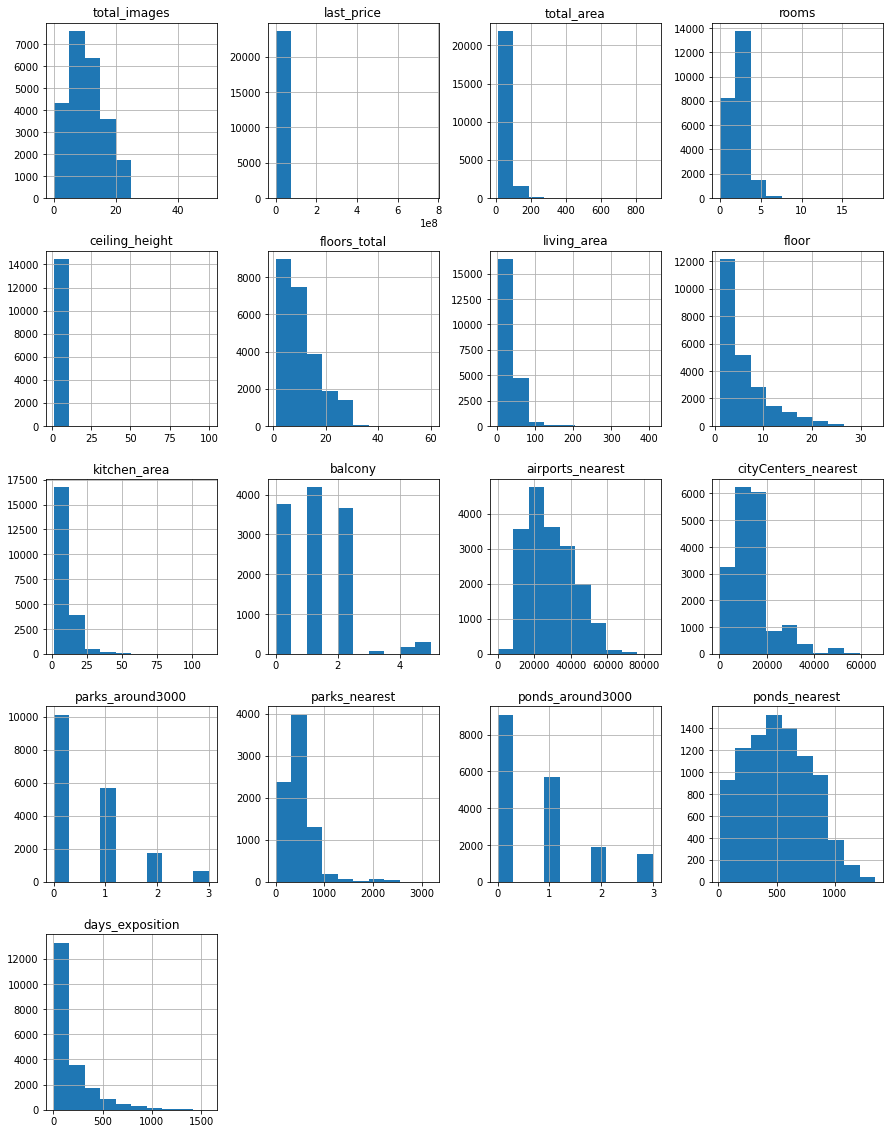

In [3]:
data.hist(figsize=(15, 20));

#### Итог: Первые наблюдения о данных  
Данные содержат **23699** записей в 22 столбцах. (Наименования столбцов - ok.)

В таблице есть пропущенные значения (NaN) - 14 столбцов:  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)  
- `cityCenters_nearest` — расстояние до центра города (м)  
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)  

*Есть предположение о симметричности пропусков. Необходимо проверить.*
 
Есть необходимость в преобразовании типа:  
- `first_day_exposition` -  object в date_time
- `floors_total` - float64 в int
- `is_apartment` - object в bool
- `balcony` - float64 в int
- `parks_around3000` - float64 в int
- `ponds_around3000` - float64 в int
- `days_exposition` - float64 в int  

Есть аномальные значения: 
- `ceiling_height` — высота потолков (м) - максимальное значение порядка 14000 м, что аномально.


### Предобработка данных

#### Пропущенные значения  


In [4]:
total_records = data.shape[0]
missed = pd.DataFrame(data.isna().sum(), columns=['missed'])
missed = missed.query('missed > 0').sort_values(by='missed', ascending=False)
missed['rate_%'] = missed['missed'] / total_records * 100
missed

,missed,rate_%
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
parks_around3000,5518,23.283683
ponds_around3000,5518,23.283683
days_exposition,3181,13.422507


- `missed` - Количество пропусков
- `rate_%` - Доля от исходных данных  

**Симметричность пропусков**  
В столбцах `parks_around3000`, `ponds_around3000` - одинкаовое число пропусков.  
На 1 пропуск больше в столбце `cityCenters_nearest` и похожее число пропусков у `airport_nearest` и эти пропуски также совпадают с предыдущими.

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

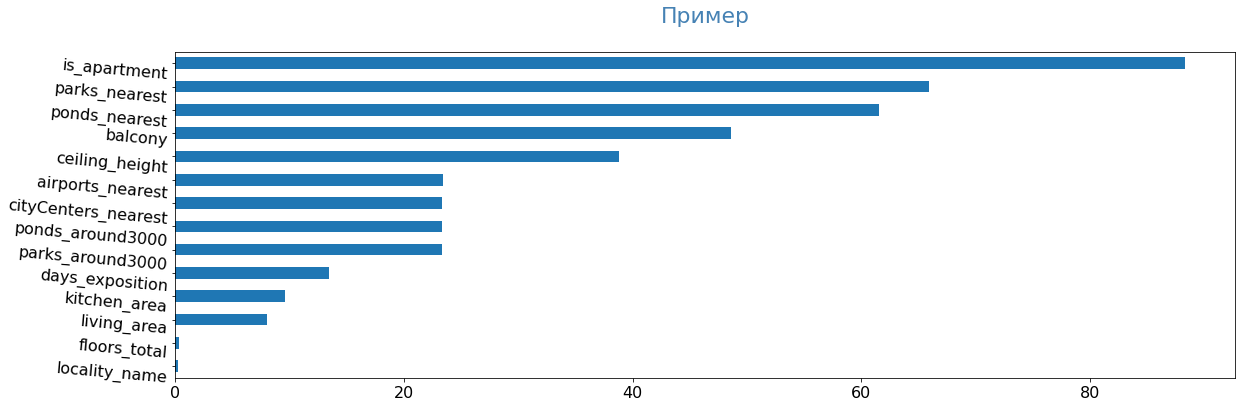

In [6]:
pass_value_barh(data)

In [7]:
# симметричность пропусков parks_around3000 и ponds_around3000
print('Совпадение пропусков parks_around3000 и ponds_around3000: ',
      ((data['parks_around3000'].isnull()) & (data['ponds_around3000'].isnull())).sum()
     )

# симметричность пропусков parks_around3000 и cityCenters_nearest
print('Совпадение пропусков parks_around3000 и cityCenters_nearest: ',
      ((data['parks_around3000'].isnull()) & (data['cityCenters_nearest'].isnull())).sum()
     )

# симметричность пропусков airports_nearest и cityCenter_nearest
print('Совпадение пропусков airports_nearest и cityCenter_nearest: ',
      ((data['airports_nearest'].isnull()) & (data['cityCenters_nearest'].isnull())).sum()
     )

Совпадение пропусков parks_around3000 и ponds_around3000:  5518
Совпадение пропусков parks_around3000 и cityCenters_nearest:  5518
Совпадение пропусков airports_nearest и cityCenter_nearest:  5518


Предположение о совпадении пропусков подтвердилось.  
Симметричность пропусков может говорить об ошибке при выгрузке данных.  
Но в данном случае, может быть и случайным совпадением из-за возможной причины не заполнения этих данных.

#### Данные, которые не участвуют в анализе
Для ответа на поставленные вопросы не требуются следующие данные:

- `airports_nearest` - 5542 пропусков, 23.4%
- `parks_around3000` - 5518 пропусков, 23.3%
- `ponds_around3000` - 5518 пропусков, 23.3%
- `ponds_nearest` - 14589 пропусков, 61.6%  
  
Эти данные можно не заполнять, так как они не повлияют на расчёты.

#### Какие значения можно заполнить, а какие нет

_1) Значения, которые нельзя восстановить:_  
- `locality_name` - 0.2%.  
Эти значения не связаны с другими данными. Средние или типовые значения здесь не подходят.  

_2) Значения, пропуски в которых скорее всего тяготеют к одному из типовых значений "по умолчанию":_

- `is_apartment` - 88.3%
- `balcony` - 48.6%  
Доля пропусков этих значений самая высокая, но заполнить её корректными наиболее вероятными значениями возможно.

_3) Значения, которые взаимосвязаны и могут быть пропущены для определенных категорий:_

- `living_area` - 8%
- `kitchen_area` - 9.6%  

В маленьких квартирах, квартирах-студиях или квартирах с открытой планировкой кухня может быть не выделена.
Соответственно, значения могут быть связаны с:  
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `open_plan` — свободная планировка (булев тип)  

_4) Значения, которые можно заменить на средние, медианные:_

- `ceiling_height` - 38.8 %  
Для заполнения этого значения можно выбрать среднее значение среди предложений в том же районе или в домах аналогичной этажности.  

- `floors_total` - 0.4 %  
Доля пропущенных значений не велика.  
Для корректного заполнения можно использовать информацию об этаже, на котором расположена квартира.  

- `days_exposition` - 13.4%  
Доля пропущенных значений значительна.  
Можно предположить, что выгрузка содержит не только уже проданные квартиры, но и те, что еще остаются в продаже и это является причиной неполнения данных. У нас есть дата первой публикации, которая поможет расчитать фактическое кол-во дней экспозиции.

_5) Географические данные, которые можно попробовать заполнить:_  
- `airports_nearest` - 23.4%
- `cityCenters_nearest` - 23.3%
- `parks_around3000` - 23.3%
- `parks_nearest` - 65.9%
- `ponds_around3000` - 23.3%
- `ponds_nearest` - 61.6%  
Если в пределах 3 км есть парк, то можно поставить значение "расстояние до парка" = 3 км. И, наоборот, если ближайший парке далее 3 км, то в пределах 3 км парков точно нет.

##### Пропущенные значения locality_name - название населённого пункта
Пропущено **49** значений, **0.2%** данных.  
Эти значения не связаны с другими данными. Средние или типовые значения здесь не подходят.  

Наиболее веротяной причиной пропуска является техническая ошибка или человеческий фактор. Например, может быть неполнота адресных справочников в системе размещения объявлений и т.п.  

Доля пропущенных значений не велика. Такие пропуски можно было бы удалить.  
Но название населённого пункта, скорее всего это не самое главное для анализа, а другие данные могут быть полезны.  
Поэтому, заменим название на `'Неизвестно'`.

In [8]:
data['locality_name'] = data['locality_name'].fillna(value='Неизвестно')
data['locality_name'].isna().sum()

0

#### Вывод
49 значений заполнено названием "Неизвестно".

##### Пропущенные значения balcony - число балконов

Пропущено **11519**	значений, **48.6%** данных.  
Наиболее веротяной причиной пропуска является отсутствие балкона у квартиры, поэтому это значение осталось незаполненым. 
Не смотря на то, что объём пропущенных данных значительный, предположение о такой причине пропуска тоже выглядит достоверным.  Так же, это можно проверить, сравнив другими независимыми данным о сотношении квартир с балконами и без.
  
Из этого предположения заполним пропущенные значения значением `0`.

In [9]:
(print('Доля квартир с балконами в заполненных данных: {:.2%}'
    .format(data.query('balcony > 0')['balcony'].count() / data['balcony'].count()))
)
(print('Доля квартир с балконами при принятии, что все незаполненные квартиры без балкона: {:.2%}'
    .format(data.query('balcony > 0')['balcony'].count() / data.shape[0]))
)

Доля квартир с балконами в заполненных данных: 69.15%
Доля квартир с балконами при принятии, что все незаполненные квартиры без балкона: 35.54%


In [10]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'].isna().sum()  # Проверка

0

#### Вывод
11519 значений заполнено 0.

##### Пропущенные значения is_apartment - апартаменты

Пропущено **20924**	значений, **88.3%** данных.  
Данные этого столбца никак не связаны с другими столбцами, т.е. по другим данным нельзя откорректировать этот столбец. 
Наиболее вероятной причиной пропусков является принадлежность недвижимости к наиболее распространённому типу - жилые помещения, т.е. не являющиеся аппартаментами.  Не смотря на то, что объём пропущенных данных значительный, предположение о такой причине пропуска тоже выглядит достоверным.  Так же, это можно проверить, сравнив другими независимыми данным о сотношении квартир аппартаментов на рынке.  

Другие особенности аппартементов, которые можно учесть: 
- Аппартаменты обычно встречаются в крупных населенных пунктах
- В крупных мегополисах такие новые застройки преимущественно ближе к центру
- Цена на апартамены примерно на 10%-15% ниже. Часто незаполнение таких данных является осознанным с целью показать более привлекательную цену в сравнении с обычной недвижимостью.

Из этого предположения заполним пропущенные значения значением `False`.

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

`NaN` _- тип, не относящийся к bool. Это возможная причина типа object в исходных данных._

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
display(data['is_apartment'].unique())  # Проверка возможных значений
data['is_apartment'].isna().sum()

array([False,  True])

0

#### Вывод
20924 значений заполнено False.

##### Пропущенные значения living_area - жилая площадь, и kitchen_area - площадь кухни

- `living_area` - пропущено **1903** значений, 8% данных.
- `kitchen_area` - пропущено **2278** значений, 9.6% данных.  

Предположим, что эти значения не указаны для случаев, когда у нас свободная планировка или квартира-студия.  
Проверим эти случаи:

In [13]:
print('Всего пропущенных значений жилой площади', data['living_area'].isnull().sum())
(print('Пропущена жилая площадь в открытой планировке',
       ((data['living_area'].isna()) & (data['open_plan'] == True)).sum(),'раз.')
)
(print('Пропущена жилая площадь в студиях',
       ((data['living_area'].isna()) & (data['studio'] == True)).sum(),'раз.')
)
print()
print('Всего пропущенных значений площади кухни', data['kitchen_area'].isnull().sum())
(print('Пропущена площадь кухни в открытой планировке',
       ((data['kitchen_area'].isna()) & (data['open_plan'] == True)).sum(),'раз.')
)
(print('Пропущена площадь кухни в студиях',
       ((data['kitchen_area'].isna()) & (data['studio'] == True)).sum(),'раз.')
)

Всего пропущенных значений жилой площади 1903
Пропущена жилая площадь в открытой планировке 5 раз.
Пропущена жилая площадь в студиях 10 раз.

Всего пропущенных значений площади кухни 2278
Пропущена площадь кухни в открытой планировке 67 раз.
Пропущена площадь кухни в студиях 149 раз.


Совпадений слишком мало.  

К счастью, у нас нет пропусков в общей площади квартир и количестве комнат.  
Произведём замены так:  
1) Рассчитаем медианное значение соответвующих площадей для каждого варианта количества комнат.  
2) Расчитаем соотношение общей площади к соответствующей медианной площади для каждой категории комнат.  
3) Заполним пропуски соответствующим пропорциональным значением от общей площади квартиры с пропуском.  

Таким образом, для квартиры с любой площадью будут вычислены пропорциональные значения для заполнения.

Логика для жилой площади и площади кухни одинакова.

In [14]:
# Количество пропущенных значений по комнатам
missed_by_rooms = data.query('kitchen_area.isna() or living_area.isna()')[['rooms','kitchen_area','living_area']]
missed_by_rooms[['kitchen_area','living_area']] = missed_by_rooms[['kitchen_area','living_area']].isna()
missed_by_rooms = missed_by_rooms.pivot_table(index='rooms',values=['living_area','kitchen_area'], aggfunc='sum')
missed_by_rooms = missed_by_rooms.rename(columns={'kitchen_area' : 'missed_kitchen_area', 'living_area' : 'missed_living_area'})

# Средние значения площадей: жилой и кухни по комнатам 
area_ratio = data.pivot_table(index='rooms', values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')
area_ratio['living_ratio'] = area_ratio['living_area'] / area_ratio['total_area']
area_ratio['kitchen_ratio'] = area_ratio['kitchen_area'] / area_ratio['total_area']

# Объендиним для наглядности
area_ratio = area_ratio.merge(missed_by_rooms, on='rooms', how='outer')
area_ratio.style.format("{:,.2f}")
area_ratio

,kitchen_area,living_area,total_area,living_ratio,kitchen_ratio,missed_kitchen_area,missed_living_area
rooms,,,,,,,
0,NaN,18.000,26.05,0.690979,NaN,197.0,14.0
1,9.04,17.600,36.56,0.481400,0.247265,834.0,659.0
2,8.80,30.500,53.00,0.575472,0.166038,654.0,644.0
3,9.50,45.000,73.00,0.616438,0.130137,434.0,448.0
4,11.10,63.600,99.30,0.640483,0.111782,99.0,91.0
5,15.10,91.785,146.45,0.626733,0.103107,41.0,34.0
6,19.50,123.900,184.30,0.672273,0.105806,8.0,6.0
7,20.00,145.000,214.00,0.677570,0.093458,7.0,6.0
8,25.00,161.000,235.70,0.683072,0.106067,3.0,0.0


- `kitchen_area` - Медианное значение площади кухни
- `living_area` - Медианное значение жилой площади
- `total_area` - Медианное значение общей площади
- `living_ratio` - Соотношение медианной жилой к мединной общей площади
- `kitchen_ratio` - Соотношение медианной площади кухни к мединной общей площади
- `missed_kitchen_area` - Кол-во пропущенных значений площади кухни
- `missed_living_area` - Кол-во пропущенных значений жилой площади  

Очень хорошо, что нет пропущенных значений в 10-комнатных и более квартирах. И основное количество пропусков сосредоточилось для 1-, 2-, 3-комнатных квартир.   
А вот для 0-комнатных все 197 значений площади кухни пропущены. Что это за квартиры с 0 комнат не понятно. Возможно, придётся исключить эти данные. Так как общие площади таких квартир малы, отсутствие кухни там тоже вполне справедливое допущение. Площадь кухни в таких квартирах обнулим.

In [15]:
# Проверка корректности суммы жилой площади и кухни по сравнению с полной площадью
data.query('living_area + kitchen_area >= total_area * 0.9')['total_area'].count()

475

In [16]:
# обнуление соотношения для квартир с 0 комнатами
area_ratio.loc[0,'kitchen_ratio'] = 0

In [17]:
# Функция для заполнения
def Fill_Area(total_area           # общая площадь
              , filled_area        # площадь которую будем заполнять (нормально это NaN)
              , filled_area_ratio  # коэффициент от общей площади
              , other_area):       # площадь уже занятыая другими помещениями
    
    if np.isnan(filled_area):
        filled_area = 0
    if np.isnan(other_area):
        other_area = 0
        
    free_area = total_area * 0.9 - filled_area - other_area
    if free_area < 0:
        # Исходные данные уже некорректны, так как площадь включаемого помещения больше общей площади
        return 0
    
    new_filled_area = total_area * filled_area_ratio;
    if new_filled_area > free_area:
        # Урезаем значение до величины доступного объёма
        new_filled_area = free_area
    return new_filled_area

# Заполнение пропусков жилой площади переданной строки
def Fill_Living_Area_Row(row, filled_area_ratio): # , filled_area_ratio):
    return Fill_Area(row['total_area']
                    ,row['living_area']
                    ,filled_area_ratio
                    ,row['kitchen_area'])

# Заполнение пропусков площади кухни переданной строки
def Fill_Kitchen_Area_row(row, filled_area_ratio): # , filled_area_ratio):
    return Fill_Area(row['total_area']
                    ,row['kitchen_area']
                    ,filled_area_ratio
                    ,row['living_area'])

In [18]:
# Заполнение пропусков жилой площади
print('Было пропусков жилой:', data['living_area'].isnull().sum())

for i in data[data['living_area'].isnull()]['rooms'].unique():
    living_ratio = area_ratio.loc[i,'living_ratio']
   
    condition = (data.loc[:,'living_area'].isnull()) & (data.loc[:,'rooms'] == i)
    data.loc[condition,'living_area'] = (data.loc[condition]
                                         .apply(Fill_Living_Area_Row
                                                ,filled_area_ratio=living_ratio
                                                ,axis=1)
                                        )
    
print('Стало пропусков жилой:', data['living_area'].isnull().sum())

# Заполнение пропусков площади кухни
print('Было пропусков площади кухни:', data['kitchen_area'].isnull().sum())
                                         
for i in data[data['kitchen_area'].isnull()]['rooms'].unique():    
    kitchen_ratio = area_ratio.loc[i,'kitchen_ratio']
                                         
    condition = (data.loc[:,'kitchen_area'].isnull()) & (data.loc[:,'rooms'] == i)
    data.loc[condition,'kitchen_area'] = data.loc[condition,'total_area'] * kitchen_ratio
    data.loc[condition,'kitchen_area'] = (data.loc[condition]
                                         .apply(Fill_Kitchen_Area_row
                                                ,filled_area_ratio=kitchen_ratio
                                                ,axis=1)
                                         )
                                         
print('Стало пропусков площади кухни:', data['kitchen_area'].isnull().sum())

Было пропусков жилой: 1903
Стало пропусков жилой: 0
Было пропусков площади кухни: 2278
Стало пропусков площади кухни: 0


In [19]:
# Проверка корректности алгоритма заполнения
data.query('living_area + kitchen_area >= total_area * 0.9')['total_area'].count()

518

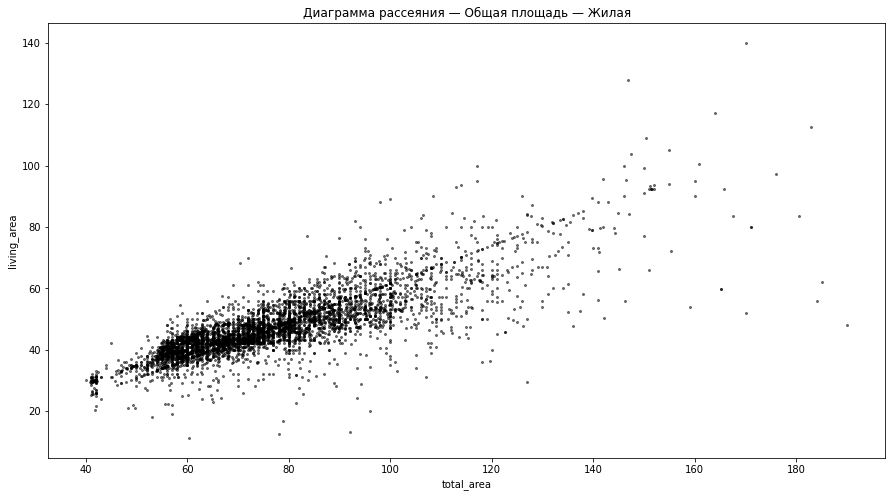

In [20]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

#### Вывод
Заполнение пропусков производилось в зависимости от количества комнат в квартире. Расчитывалась пропорция от медианного значения площади квартир с соответствующим числом комнат.  

Заполнены 1903 пропусков жилой площади.  
Заполнены 2278 пропусков площади кухни.

##### Пропущенные значения floors_total - всего этажей в доме
Пропущено **86** значений, **0.4%** данных.  
Доля пропущенных значений не велика.  
Для корректного заполнения можно использовать информацию об этаже, на котором расположена квартира.  
Другой варинат - основываться на средней этажности домов в этом районе.  
Также дома, обычно имеют некое типичное количество этажей. Сделаем выборку таких значений из данных.
Заполним медианным значением, но не ниже этажа, на котором расположена квартира.  

In [21]:
# Варианты этажности домов
floors_range = pd.DataFrame(data = data['floors_total'].unique(), columns= ['floors_range'])
floors_range.sort_values(by = 'floors_range', inplace= True)
floors_range.reset_index(inplace= True, drop= True)

print('Все варианты этажности в данных:')
print(sorted(data['floors_total'].unique()))

# Медианное значение
median_floors_total = int(data['floors_total'].median())

# Есть ли такое в вариантах этажей ?
# Если нет, то берем следующее большее (медиана не бывает больше максимума)
for i in floors_range['floors_range']:
    if i >= median_floors_total:
        median_floors_total = i
        break
print('Выбранное медианное значение этажей', median_floors_total)


# Заполним пропуски по правилу медиана или, если этаж выше медианы, то ближайший высокий этаж из вариантов этажности.
# Функция для заполнения
def fill_floors_total(floor):
    if floor <= median_floors_total:
        return median_floors_total
    else:
        for i in floors_range['floors_range']:
            if i >= floor:
                return i
            break
        # то чего не может быть..
        return median_floors_total

condition = data.loc[:,'floors_total'].isna()
data.loc[condition,'floors_total'] = data.loc[condition,'floor'].apply(fill_floors_total)

# проверка заполнения
data['floors_total'].isna().sum()

Все варианты этажности в данных:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0]
Выбранное медианное значение этажей 9.0


0

#### Вывод
86 пропуском общего числа этажей заполнены либо выбранным на основе расчётов медианным значением этажности - 9 (для низких этажей), либо ближайшим большим значением из списка встречающихся в данных этажностей домов (случай, когда этаж квартиры больше выбранного медианнного).

#### Пропущенные значения ceiling_height - высота потолков, м
Пропущено **9195**	значений, **38.8%** данных.

Высота потолка, чаще всего, является "стандартным" значением. Хотя, вполне может зависеть от месторасположения, года постройки дома.  
Но причиной незаполненных данных скорее всего является умолчание этого значения в силу того, что этот показатель для квартиры "стандартный".  

Для заполнения этого значения выберем среднее значение. (Безусловно, посмотрим на него при расчёте).

In [22]:
avg_ceiling_height = data['ceiling_height'].mean()
print(f'Средняя высота потолков в Санкт-Петербурге: {avg_ceiling_height:.2f} м')
data['ceiling_height'] = data['ceiling_height'].fillna(avg_ceiling_height)
data['ceiling_height'].isnull().sum()

Средняя высота потолков в Санкт-Петербурге: 2.77 м


0

#### Вывод
9195 пропущенных значений заполнены средним значением по Санкт-Петербургу - 2.77 м.

#### Пропущенные значения days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Пропущено **3181**	значений, **13.4%** данных.

Доля пропущенных значений значительна.
Можно предположить, что выгрузка содержит не только уже проданные квартиры, но и те, что еще остаются в продаже и это является причиной неполнения данных.  
В исследовании требуется ответить на вопрос "как быстро продавались квартиры?".  
Соответственно, попытка расчёта и заполнения данными для непроданных квартир внесёт только искажения в данные.  

Поэтому, эти значения не будем заполнять.

#### Пропущенные значения cityCenters_nearest - расстояние до центра города (м)
Пропущено **5519**	значений, **23.3%** данных.

Доля велика, чтобы эти значения откинуть. Наверное, единственнное, что можно попробовать использовать: - это расчитать медианное значение по населенным пунктам.  
Посмотрим какие данные могут быть особенно чувствительными.

In [23]:
# Количество пропущенных значений расстояния до центра по городам
total_locality = pd.DataFrame()
total_locality['total_qty'] = data.groupby('locality_name')['locality_name'].count()

missed_locality = (data
                   .query('cityCenters_nearest.isna()')
                   [['locality_name','cityCenters_nearest']]
                  )
missed_locality['cityCenters_nearest'] = missed_locality['cityCenters_nearest'].isna()
missed_locality = (missed_locality
                   .pivot_table(index='locality_name', values=['cityCenters_nearest'], aggfunc='sum')
                   .sort_values(by='cityCenters_nearest', ascending=False)
                  )
missed_locality = missed_locality.rename(columns={'cityCenters_nearest' : 'missed_qty'})

missed_locality = missed_locality.merge(total_locality, on='locality_name', how='left')

missed_locality['missed_total_rate'] = round(missed_locality['missed_qty'] / total_records * 100, 1)
missed_locality['missed_local_rate'] = round(missed_locality['missed_qty'] / missed_locality['total_qty'] * 100, 1)

display(missed_locality.sort_values(by='missed_local_rate').head(30))

print('Всего городов с пропущенными значениями: ', missed_locality.shape[0])
print('В первой десятке (по количеству пропусков) {0:.1f} % пропусков (от всех данных)'.format(missed_locality['missed_total_rate'].head(10).sum()))

,missed_qty,total_qty,missed_total_rate,missed_local_rate
locality_name,,,,
Колпино,1,338,0.0,0.3
Пушкин,1,369,0.0,0.3
Санкт-Петербург,61,15721,0.3,0.4
Ломоносов,1,133,0.0,0.8
посёлок Шушары,4,440,0.0,0.9
Кронштадт,1,96,0.0,1.0
Красное Село,2,178,0.0,1.1
Неизвестно,8,49,0.0,16.3
поселок Мурино,32,34,0.1,94.1


Всего городов с пропущенными значениями:  346
В первой десятке (по количеству пропусков) 10.4 % пропусков (от всех данных)


In [24]:
print('Всего населённых пунктов: {0}'.format(len(data['locality_name'].unique())))

Всего населённых пунктов: 365


- `missed_qty` - Количество пропущенных
- `total_qty` - Всего объявлений по населенному пункту
- `missed_total_rate` - Доля в % пропущенных во всех данных
- `missed_local_rate` - Доля в % пропущенных по населённому пункту  

Итого, у нас **365** населённых пунктов с неизвестными расстояними до центра города.  А значения пропущены в **346**.  
Это почти все имеющиеся населенный пункты в данных.  

Данные о расстояниии до центра города не заполнены для подавляющего большинства населенных пунктов.  
Можем выделить только 7 населённых пунктов, для которых данные, в основном, заполнены и количество пропущенных данных может дыть возможность проводить анализ на основе информации о расстоянии от центра.

In [25]:
display(missed_locality.sort_values(by='missed_local_rate').query('missed_local_rate < 5'))

,missed_qty,total_qty,missed_total_rate,missed_local_rate
locality_name,,,,
Колпино,1,338,0.0,0.3
Пушкин,1,369,0.0,0.3
Санкт-Петербург,61,15721,0.3,0.4
Ломоносов,1,133,0.0,0.8
посёлок Шушары,4,440,0.0,0.9
Кронштадт,1,96,0.0,1.0
Красное Село,2,178,0.0,1.1


Попробуем узнать, что у нас есть в таблице. Посчитаем средние расстояния по городам и посмотрим пересечение таблиц.

In [26]:
# Средние значения расстояний до центра
avg_distance = data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='mean')

# Объендиним для наглядности по пересечению
missed_locality = missed_locality.merge(avg_distance, on='locality_name', how='inner')
display(missed_locality)
print('Найдено {0} совпадений.'.format(missed_locality.shape[0]))
print('Можем заполнить {0} значений.'.format(missed_locality['missed_qty'].sum()))

,missed_qty,total_qty,missed_total_rate,missed_local_rate,cityCenters_nearest
locality_name,,,,,
Санкт-Петербург,61,15721,0.3,0.4,11601.291571
поселок Мурино,32,34,0.1,94.1,21888.000000
посёлок Щеглово,22,23,0.1,95.7,34085.000000
Неизвестно,8,49,0.0,16.3,11278.902439
посёлок Шушары,4,440,0.0,0.9,24243.387615
Красное Село,2,178,0.0,1.1,30020.284091
Колпино,1,338,0.0,0.3,32113.771513
Кронштадт,1,96,0.0,1.0,49195.726316
Ломоносов,1,133,0.0,0.8,50739.969697


Найдено 10 совпадений.
Можем заполнить 133 значений.


In [27]:
# Функция для заполнения
missed_locality.reset_index(inplace=True)
missed_before = data['cityCenters_nearest'].isna().sum()

for locality, val in missed_locality[['locality_name','cityCenters_nearest']].values:
    condition = data.loc[:,'locality_name'] == locality
    data.loc[condition, 'cityCenters_nearest'] = data.loc[condition, 'cityCenters_nearest'].fillna(val)

# проверка заполнения
print('Заполнили: ', missed_before - data['cityCenters_nearest'].isna().sum())

Заполнили:  133


Оставшиеся пропуски невозможно заполнить. Оставим пропуски.

In [28]:
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
#data['cityCenters_nearest'].isna().sum()

#### Вывод
- Было пропущенных значений: 5519
- Удалось заполнить средними значениями по населенному пункту, для 10 нас. пунктов: 133 значений.
- 5386 остались не заполннеными.  

- Из 365 населённых пунктов пропуски в 346. Это почти все имеющиеся населенный пункты в данных.  

Данные о расстоянии заполнены на приемлемом уровне для проведения анализа только для 7 населённых пунктов:  
Колпино, Пушкин, Санкт-Петербург, Ломоносов, посёлок Шушары, Кронштадт, Красное Село.  
Это означает, что анализ данных, связанный с расстоянием до центра Санк-Петербурга возможно провести только для этих 7 населённых пунктов.

#### Остальные пропущенные значения

Оставшиеся пропущенные значения не требуятся нам для ответа на вопрос о влиянии на стоимость жилья:

- `airports_nearest` - 23.4%
- `cityCenters_nearest` - 23.3%
- `parks_around3000` - 23.3%
- `parks_nearest` - 65.9%
- `ponds_around3000` - 23.3%
- `ponds_nearest` - 61.6%  

Поэтому, не будем заполнять их и отсавим без изменения.

#### Типы данных


#### Тип first_day_exposition - день публикации объявления
Конвертируем в тип datetime.

In [29]:
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
    print('first_day_exposition - Ok')
except:
    print('first_day_exposition - Есть неконвертируемые значения.')

first_day_exposition - Ok


##### Тип is_apartment - апартаменты  
По характеру значений это тип bool.  
Возможной причиной типа *object* в исходных данных является наличие пропущенных значений (NaN), которые не могут быть отнесены к типу bool.  
После заполнения пропусков, этой проблемы нет.

#### Конвертация float -> int

Конвертируем из float в int те значения, что очевидно целочисленные:  
- `floors_total` - float64 в int
- `balcony` - float64 в int
- `parks_around3000` - float64 в int
- `ponds_around3000` - float64 в int
- `days_exposition` - float64 в int  

Так, как мы не на 100% заполнили данные, для ряда стобцов конвертацию будет невозможна.

In [30]:
# Конвертаций в int много. Сделаем через функцию
def converter_to_int (column_with_float):
        try:
            x = column_with_float.astype(int)
            print(column_with_float.name,'- Ok')
            return x
        except:
            print(column_with_float.name,'- Есть неконвертируемые значения.')
            return column_with_float

columns_to_convert = [
    'floors_total','balcony','airports_nearest','cityCenters_nearest',
    'parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition' 
]

for k in columns_to_convert:
    data[k] = converter_to_int(data[k])

# Проверка после приведения типов
print()
data.info()

floors_total - Ok
balcony - Ok
airports_nearest - Есть неконвертируемые значения.
cityCenters_nearest - Есть неконвертируемые значения.
parks_around3000 - Есть неконвертируемые значения.
parks_nearest - Есть неконвертируемые значения.
ponds_around3000 - Есть неконвертируемые значения.
ponds_nearest - Есть неконвертируемые значения.
days_exposition - Есть неконвертируемые значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null 

#### Вывод:

- first_day_exposition - день публикации объявления.  
Тип изменён на datetime.

- is_apartment - апартаменты.  
После заполнения данных восстановлен тип bool.

Сконевертироваы в тип int:  
- floors_total - сконвертирован в int
- balcony - сконвертирован в int
- cityCenters_nearest - сконвертирован в int

Оставлен тип float, т.к. остались пропущенные значения типа NaN:  
- airports_nearest - Есть неконвертируемые значения.
- parks_around3000 - Есть неконвертируемые значения.
- parks_nearest - Есть неконвертируемые значения.
- ponds_around3000 - Есть неконвертируемые значения.
- ponds_nearest - Есть неконвертируемые значения.
- days_exposition - Есть неконвертируемые значения.

#### Дубликаты

In [31]:
# Проверка явных дубликатов
data.duplicated().sum()

0

Явных дубликатов нет.   
Приступаем к поиску неявных.

In [32]:
len(data['locality_name'].unique())

365

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что в названиях есть вариации:  
- с буквой "ё"
- в обозначении типа населённого пункта  

Сначала избавимся от лишних пробелов и заменим буквы "ё" на "е".

In [34]:
# Очистка от дубликатов с "ё" и лишними пробелами
def Clear_Str(word):
    word = word.replace('ё','е') # Заменяем Ё на Е
    word = word.lstrip() # удаляем пробелы в начале
    word = word.rstrip() # удаляем пробелы в конце

    return word

data['locality_name'] = data['locality_name'].apply(Clear_Str)
len(data['locality_name'].unique())

331

Благодаря предварительной очистке уменьшили на 34 наименования.  
Теперь поработаем с типами населённых пунктов.

In [35]:
# Выделим только наименования населенных пунктов, отрезав типы населённых пунктов
def Core_Name(word):
    word = word.lower()  # приводим к нижнему регистру
    word = word.replace('ё','е') # Заменяем Ё на Е
    
    word = word.replace('садовое товарищество','')
    word = word.replace('поселок городского типа','')
    word = word.replace('городской поселок','')
    word = word.replace('поселок','')
    word = word.replace('деревня','')
    word = word.replace('село','')
    word = word.replace('поселок станции','')
    word = word.replace('садоводческое некоммерческое товарищество','')
    word = word.replace('посёлок при железнодорожной станции','')
    word = word.replace('коттеджный поселок','')

    word = word.lstrip() # удаляем пробелы в начале
    word = word.rstrip() # удаляем пробелы в конце

    return word

raw_locality_names = sorted(data['locality_name'].apply(Core_Name).unique())
len(raw_locality_names)

310

Потенциально, можем улучшить ещё 21 наименование.  
Теперь поищем вариации в типах населённых пунктов сравнивая полные исходные наименования с "чистым" наименованиями.

In [36]:
# Поиск вхождений "чистых" названий населённых пунктов в исходные названия
def SearchForCore(full_name):
    full_name = full_name.lower()  # приводим к нижнему регистру
    for n in raw_locality_names:
        if n in full_name:
            return n
    return 'название не найдено'

# Заготовка для результата
all_raw = pd.DataFrame(data = data['locality_name'].unique(), columns= ['full_name'])

# Обход полных исходных названий
all_raw['core_name'] = all_raw['full_name'].apply(SearchForCore)
all_raw = (all_raw
           .pivot_table(index=['core_name'], values='full_name', aggfunc=['count', 'sum'])
           .sort_values(by=('count','full_name'), ascending=False)
          )
all_raw = all_raw.loc[all_raw['count']['full_name'] > 1]
all_raw

,count,sum
,full_name,full_name
core_name,,
бор,8,поселок городского типа Красный БорВыборгСосно...
аро,5,деревня Ародеревня Старосиверскаядеревня Старо...
старая,4,деревня Стараяпоселок Старая Малуксасело Стара...
павлово,3,село Павловогородской поселок Павловопоселок г...
лесное,2,поселок Лесноекоттеджный поселок Лесное
жил,2,поселок Жилпоселокпоселок Жилгородок
название не найдено,2,коттеджный поселок Счастьекоттеджный поселок К...
федоровское,2,деревня Федоровскоегородской поселок Федоровское


In [37]:
# Более человекочитаемый вид для ручного поиска
for w in all_raw.index:
    condition = data['locality_name'].str.contains(w, case=False)
    print(data.loc[condition]['locality_name'].unique())

['поселок городского типа Красный Бор' 'Выборг' 'Сосновый Бор'
 'деревня Чудской Бор' 'деревня Бор' 'деревня Трубников Бор'
 'поселок Пансионат Зеленый Бор' 'деревня Борисова Грива']
['деревня Аро' 'деревня Старосиверская' 'деревня Старое Хинколово'
 'деревня Старополье' 'поселок Гончарово']
['деревня Старая' 'поселок Старая Малукса' 'село Старая Ладога'
 'деревня Старая Пустошь']
['село Павлово' 'городской поселок Павлово'
 'поселок городского типа Павлово']
['поселок Лесное' 'коттеджный поселок Лесное']
['поселок Жилпоселок' 'поселок Жилгородок']
[]
['деревня Федоровское' 'городской поселок Федоровское']
['деревня Кудрово' 'Кудрово']
['поселок Мурино' 'Мурино']
['деревня Калитино' 'поселок Калитино']
['Коммунар' 'поселок Коммунары']
['поселок городского типа Рахья' 'садовое товарищество Рахья']
['Любань' 'поселок Любань']
['деревня Рабитицы' 'поселок Рабитицы']
['поселок городского типа Советский' 'городской поселок Советский']
['городской поселок Мга' 'поселок городского типа Мга']


Теперь многие неявные дубликаты стали видимы. Приведём их в порядок.  
Названия, где явно отличаются типы поселков не меням  
(например, 'деревня Гарболово' и 'поселок Гарболово' оставляем, как есть).  
А там, где тип населенного пункта можно отнести к одному типу, меняем на один.  
(например, 'городской посёлок' приводим к 'посёлку городского типа')  
Можено было поработать просто с правильностью наименований типа населенного пунка, но те случаи, где он вообще пропущен нужно было бы также обработать отдельно.

In [38]:
# Список замен для автоматизации
replace_names = {'поселок Павлово' : 'поселок городского типа Павлово',
                 'поселок Лесное' : 'коттеджный поселок Лесное',
                 'Кудрово' : 'деревня Кудрово',
                 'Мурино' : 'поселок Мурино',
                 'Любань' : 'поселок Любань',
                 'поселок Советский' : 'поселок городского типа Советский',
                 'поселок Мга' : 'поселок городского типа Мга',
                 'поселок Назия' : 'поселок городского типа Назия',
                 'поселок Лесогорский' : 'поселок городского типа Лесогорский',
                 'поселок Рощино': 'поселок городского типа Рощино',
                 'Никольское' : 'село Никольское',
                 'поселок Большая Ижора' : 'поселок городского типа Большая Ижора',
                 'поселок Громово' : 'поселок станции Громово',
                 'Кингисепп' : 'поселок Кингисеппский'
                }

In [39]:
# Замены в цикле
for f in replace_names:
    data.loc[data['locality_name'].str.find(f) >= 0, 'locality_name'] = replace_names[f]

In [40]:
# Что осталось в итоге
print(len(data['locality_name'].unique()))

317


#### Вывод

Явных дубликатов не обнаружено.  
Количество уникальных наименований после очистки сократилось с 365 до 317.  
Таким образом, устранили **48** неявных дубликатов в названиях населённых пунктов.

#### check name

In [41]:
# check
data.locality_name.nunique()

317

#### Аномальные значения

Есть аномальные значения: 
- `ceiling_height` — высота потолков (м) - максимальное значение порядка 100 м, что аномально.   

In [42]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

Посмотрим, что в диапазоне разумных значений: от 0 до 10 м

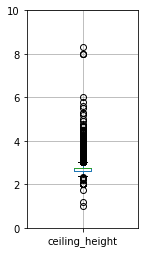

In [43]:
plt.rcParams['figure.figsize'] = (2, 4) # указываем размер визуализации
plt.ylim(0, 10)
data.boxplot(column='ceiling_height')
plt.show()

Подавляющее число значений находятся в диапазоне от 2.6 до 2.77 м.  

Значения в диапазоне от 1 м до 2,3 м выглядят странно.  
Это либо грубые ошибки, либо опять же, нетипичные выбивающиеся значения.  
Эти значения есть смысл удалить.

In [44]:
print('Количество удаляемых значений: ',
      data.loc[data.loc[:,'ceiling_height'] < 2.3, 'ceiling_height'].count()
     )
data = data.loc[data.loc[:,'ceiling_height'] >= 2.3]

Количество удаляемых значений:  16


Также, можно предположить, что значения от 24 м до 100 м это значения, с неверным порядком значений.  
Эти значения можно скорректировать, разделив на 10.

In [45]:
print('Количество корректируемых значений: ',
      data.loc[data.loc[:,'ceiling_height'] > 24, 'ceiling_height'].count()
     )
data.loc[data.loc[:,'ceiling_height'] >= 24, 'ceiling_height'] /= 10

Количество корректируемых значений:  20


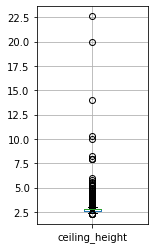

In [46]:
plt.rcParams['figure.figsize'] = (2, 4) # указываем размер визуализации
data.boxplot(column='ceiling_height')
plt.show()

Высоту до 6 м можно считать приемлемой, т.к. это могут быть, например, двухуровневые квартиры.  
Всё, что выше - это выбросы, даже, если часть таких значений достоверна, она не отражает общие тенденции.
Удалим значения выше 6 м.

In [47]:
print('Количество удаляемых значений: ',
      data.loc[data.loc[:,'ceiling_height'] > 6, 'ceiling_height'].count()
     )
data = data.loc[data.loc[:,'ceiling_height'] <= 6]

Количество удаляемых значений:  9


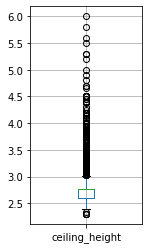

In [48]:
plt.rcParams['figure.figsize'] = (2, 4) # указываем размер визуализации
data.boxplot(column='ceiling_height')
plt.show()

Есть аномальные значения: 
- `rooms` — Количество комнат - есть значения 0.  

In [49]:
data.query('rooms == 0')['rooms'].count()

197

#### Вывод
Удалили **25** аномальных значений ceiling_height.  
Откорректировали **20** аномальных значений ceiling_height.

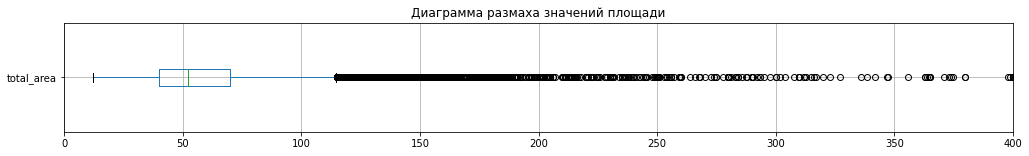

In [50]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

#### check gap

In [51]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23674 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23674 non-null  int64         
 1   last_price            23674 non-null  float64       
 2   total_area            23674 non-null  float64       
 3   first_day_exposition  23674 non-null  datetime64[ns]
 4   rooms                 23674 non-null  int64         
 5   ceiling_height        23674 non-null  float64       
 6   floors_total          23674 non-null  int64         
 7   living_area           23674 non-null  float64       
 8   floor                 23674 non-null  int64         
 9   is_apartment          23674 non-null  bool          
 10  studio                23674 non-null  bool          
 11  open_plan             23674 non-null  bool          
 12  kitchen_area          23674 non-null  float64       
 13  balcony         

In [52]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,674.00","23,674.00","23,674.00","20,497.00","23,674.00","23,674.00","23,674.00","23,674.00","23,674.00"
min,0.00,12.00,2.30,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,19.00,900.00,6.00,"1,580.00","763,000,000.00",427.55,112.00,33.00,60.00
median,2.00,52.00,2.77,95.00,"4,650,000.00",30.00,9.00,4.00,9.00


In [53]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [54]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


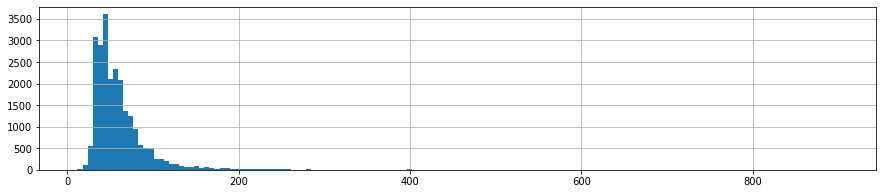

In [55]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

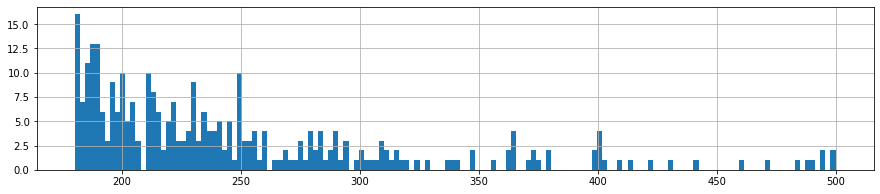

In [56]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

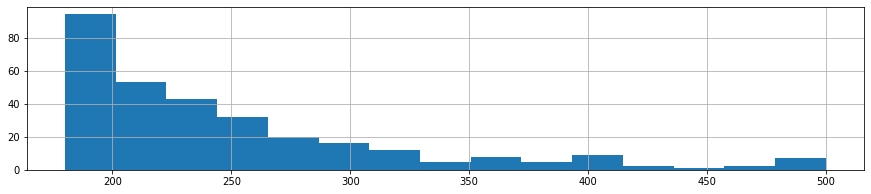

In [57]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

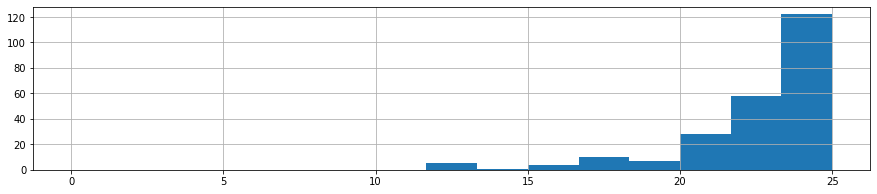

In [58]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [59]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.42,3.00,"562,038.00",9.00,0.00,1.00,2.00
0.01,1.00,25.25,2.50,4.00,"1,000,000.00",12.77,0.00,1.00,2.00
0.5,2.00,52.00,2.77,95.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,197.39,3.57,"1,069.00","36,000,000.00",123.15,35.00,23.00,26.00
0.9988,8.00,380.00,4.20,"1,370.02","124,788,048.00",248.02,58.24,26.00,34.59


#### Удаление выбивающихся значений

Квантили  last_price


0.0012    5.620380e+05
0.0100    1.000000e+06
0.5000    4.650000e+06
0.9900    3.600000e+07
0.9988    1.247880e+08
Name: last_price, dtype: float64

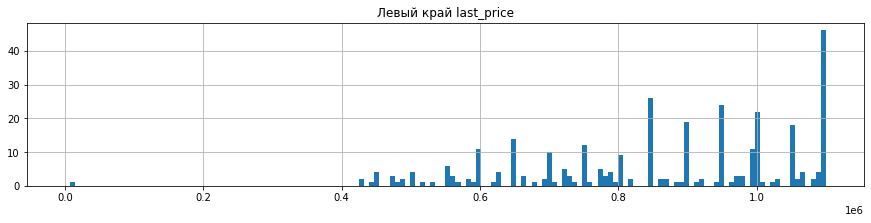

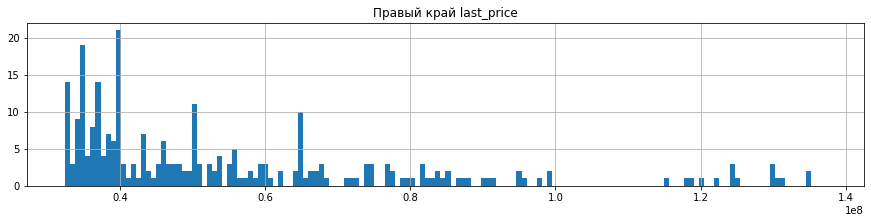

Квантили  total_area


0.0012     20.0000
0.0100     25.2511
0.5000     52.0000
0.9900    197.3890
0.9988    380.0000
Name: total_area, dtype: float64

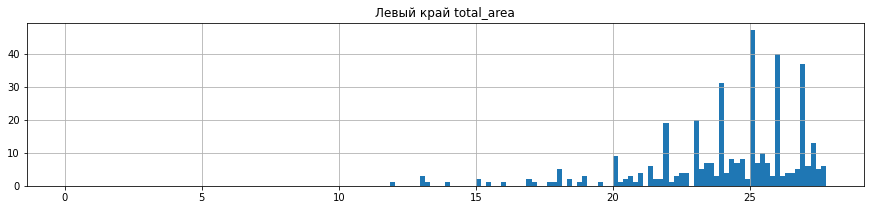

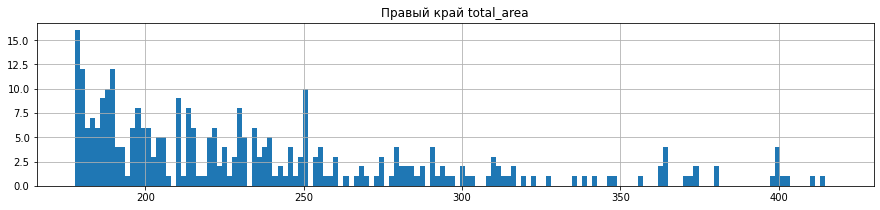

Квантили  rooms


0.0012    0.0
0.0100    1.0
0.5000    2.0
0.9900    5.0
0.9988    8.0
Name: rooms, dtype: float64

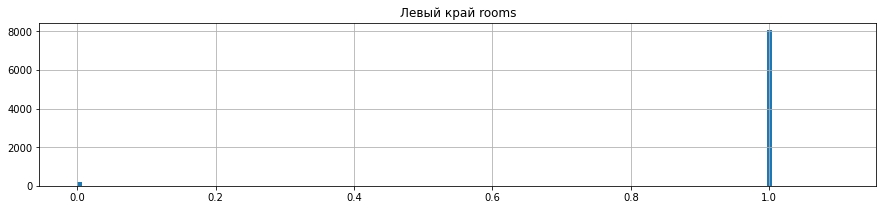

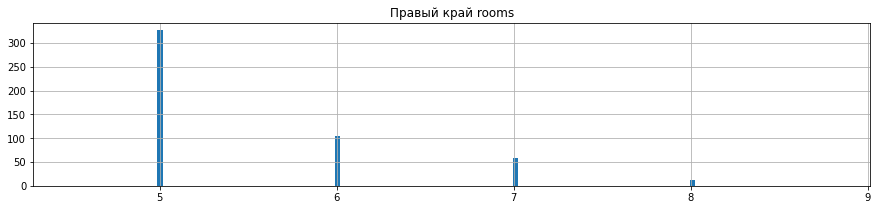

Квантили  ceiling_height


0.0012    2.420380
0.0100    2.500000
0.5000    2.771499
0.9900    3.570000
0.9988    4.200000
Name: ceiling_height, dtype: float64

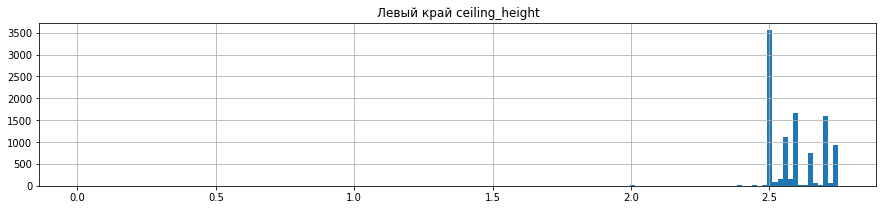

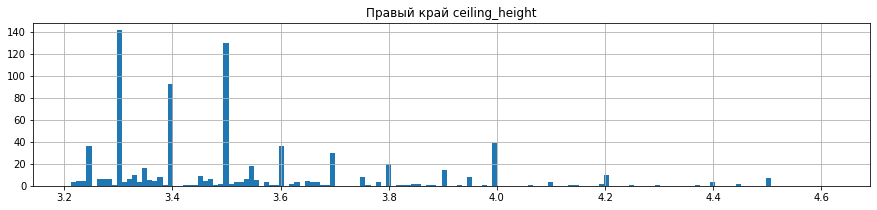

Квантили  floors_total


0.0012     2.0000
0.0100     2.0000
0.5000     9.0000
0.9900    26.0000
0.9988    34.5924
Name: floors_total, dtype: float64

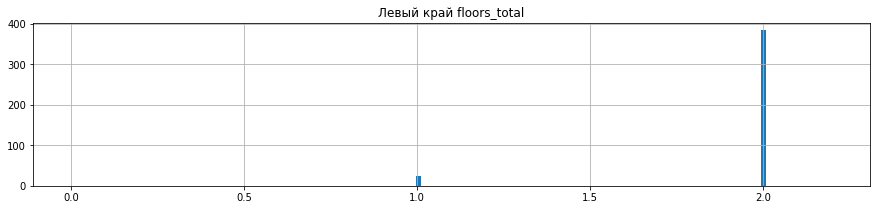

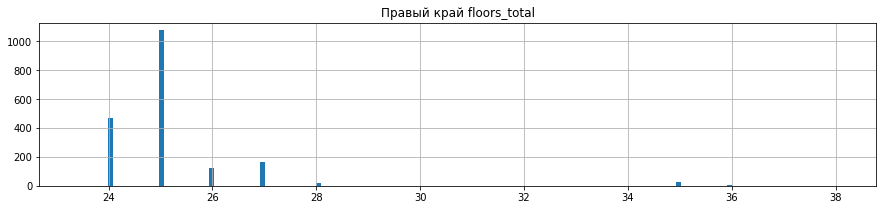

Квантили  living_area


0.0012      9.000000
0.0100     12.768400
0.5000     30.000000
0.9900    123.145900
0.9988    248.016213
Name: living_area, dtype: float64

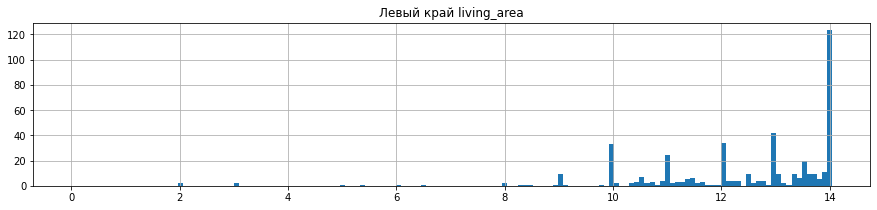

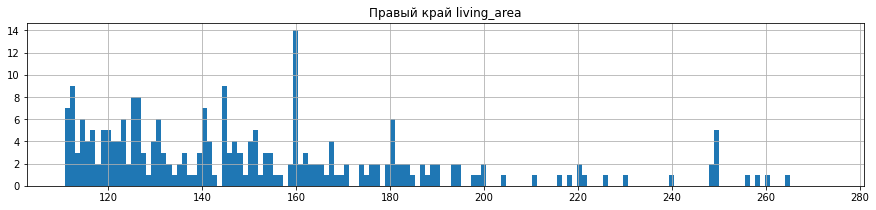

Квантили  floor


0.0012     1.0
0.0100     1.0
0.5000     4.0
0.9900    23.0
0.9988    26.0
Name: floor, dtype: float64

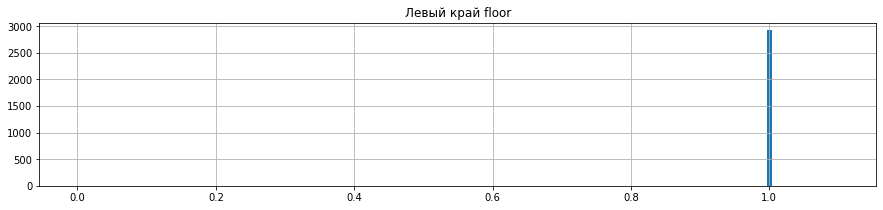

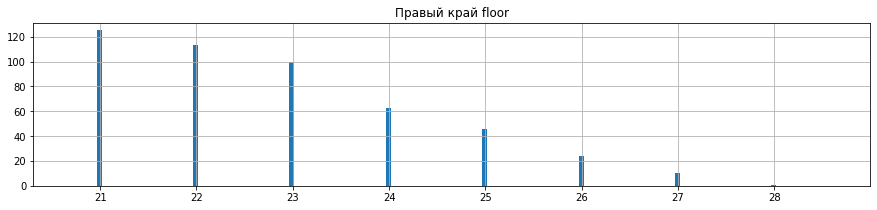

Квантили  kitchen_area


0.0012     0.00000
0.0100     0.00000
0.5000     9.00000
0.9900    35.00000
0.9988    58.23696
Name: kitchen_area, dtype: float64

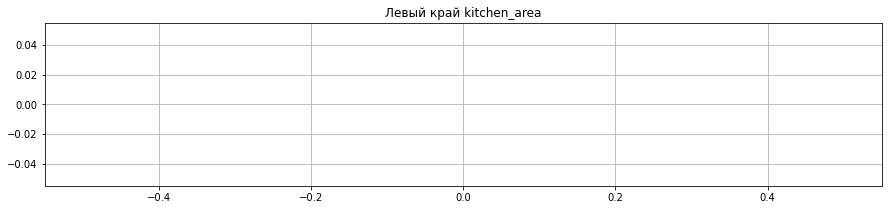

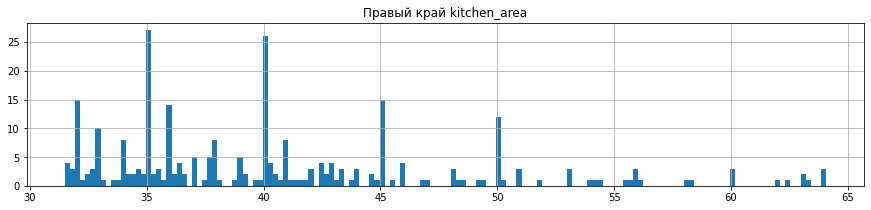

Квантили  days_exposition


0.0012       3.000
0.0100       4.000
0.5000      95.000
0.9900    1069.000
0.9988    1370.024
Name: days_exposition, dtype: float64

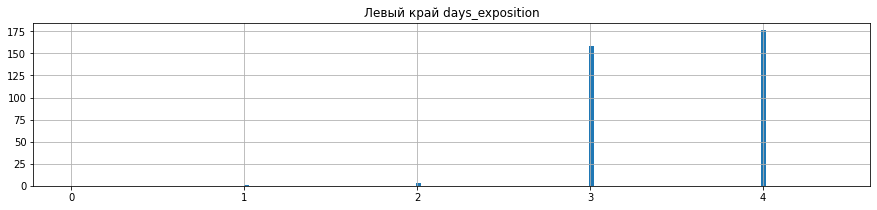

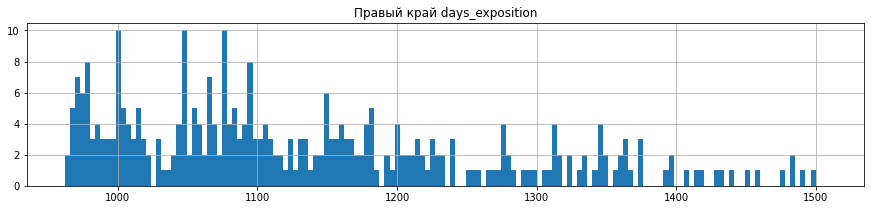

In [60]:
# Вывод гистограмм
def Hist_Edges(param, left, right, title):
    (
        df_check[param]
        .hist(bins = 150, figsize = (15,3), range = (left, right))
        .set_title(title)
    )
    plt.show()

# Список исследуемых колонок
lst = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']

# Значения параметров объектов недвижимости на разных квантилях
qantiles = (data[[c for c in data.columns if c in lst]]
            .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
            .style.format("{:,.2f}")
           ).data

for col in qantiles.columns:
    print('Квантили ', col)
    display(qantiles.loc[:,col])
    # Левый край
    Hist_Edges(param=col
               , left=0
               , right=qantiles.loc[0.01,col] * 1.1
               , title='Левый край ' + col
              )
    # Правый край
    Hist_Edges(param=col
               , left=qantiles.loc[0.99,col] * 0.9
               , right=qantiles.loc[0.9988,col] * 1.1
               , title='Правый край ' + col
              )

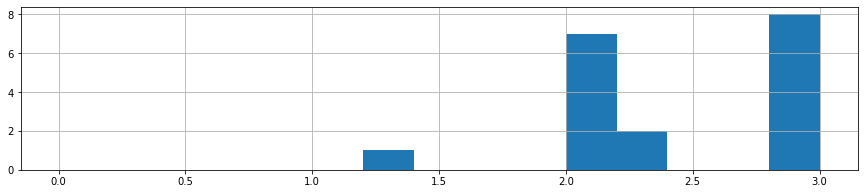

In [61]:
df_check.kitchen_area.hist(bins = 15, figsize = (15,3), range = (0,3));

Считаем редкими следующие значения:
- `rooms` - Количество комнат в квартире: более 7-ми комнат.
- `total_area` - Общая площадь: менее 20-ти и более 250-ти квадратных метров
- `ceiling_height` - Высота потолков: менее 2,5 и более 4.1 м
- `days_exposition` - Количество дней экспозиции: менее 3 и более 1400
- `last_price` - Стоимость объекта: менее 600 тыс. руб. и более 70 млн. руб.
- `living_area`- Жилая площадь: менее 9 кв. м и более 200 кв. м
- `kitchen_area` - Площадь кухни: менее 1.5 кв. м и более 59 кв. м
- `floor` - Этаж: менее 1 и более 27
- `floors_total` - Кол-во этажей в доме: менее 1 и более 27

Оценим эффект усечений.  
В количестве дней экспозиции были оставлены пропуски, поэтоиу необходимо учесть это в условии, чтобы случайно не отрезать NaN значения.

In [62]:
total_records = data.shape[0]

# Количество комнат в квартире: более 7-ми комнат.
cut_rooms = total_records - (data
                             .query('(rooms >= 1) and (rooms <= 7)')
                             .shape[0]
                            )
print('Отрезаем по Количество комнат в квартире: {:.0f}, {:.2%}'.format(cut_rooms, cut_rooms/total_records))

# Общая площадь: менее 20-ти и более 250-ти квадратных метров
cut_total_area = total_records - (data
                                  .query('(total_area >= 20) and (total_area <= 250)')
                                  .shape[0]
                                 )
print('Отрезаем по Общая площадь: {:.0f}, {:.2%}'.format(cut_total_area, cut_total_area/total_records))

# Высота потолков: менее 2,5 и более 4.1 м
cut_ceiling_height = total_records - (data
                                  .query('(ceiling_height >= 2.5) and (ceiling_height <= 4.1)')
                                  .shape[0]
                                 )
print('Отрезаем по Высота потолков: {:.0f}, {:.2%}'.format(cut_ceiling_height, cut_ceiling_height/total_records))

# Количество дней экспозиции: менее 3 и более 1400
cut_days_exposition = total_records - (data
                                  .query('(days_exposition >= 3) and (days_exposition <= 1400) \
                                           or days_exposition.isna()')
                                  .shape[0]
                                 )
print('Отрезаем по Количество дней экспозиции: {:.0f}, {:.2%}'.format(cut_days_exposition, cut_days_exposition/total_records))

# Стоимость объекта: менее 600 тыс. руб. и более 70 млн. руб.
cut_last_price = total_records - (data
                                  .query('(last_price >= 600000) and (last_price <= 70000000) \
                                          or last_price.isna()')
                                  .shape[0]
                                 )
print('Отрезаем по Стоимость объекта: {:.0f}, {:.2%}'.format(cut_last_price, cut_last_price/total_records))

# Жилая площадь: менее 9 кв. м и более 200 кв. м
cut_living_area = total_records - (data
                                   .query('(living_area >= 9) and (living_area <= 200)')
                                   .shape[0]
                                  )
print('Отрезаем по Жилая площадь: {:.0f}, {:.2%}'.format(cut_living_area, cut_living_area/total_records))

# Площадь кухни: менее 5 кв. м и более 59 кв. м
cut_kitchen_area = total_records - (data
                                    .query('(kitchen_area >= 1.5) and (kitchen_area <= 59)')
                                    .shape[0]
                                 )
print('Отрезаем по Площадь кухни: {:.0f}, {:.2%}'.format(cut_kitchen_area, cut_kitchen_area/total_records))

# Этаж: менее 1 и более 27
cut_floor = total_records - (data
                             .query('(floor >= 1) and (floor < 27)')
                             .shape[0]
                            )
print('Отрезаем по Этаж: {:.0f}, {:.2%}'.format(cut_floor, cut_floor/total_records))

# Кол-во этажей в доме: менее 1 и более 27
cut_floors_total = total_records - (data
                                    .query('(floors_total >= 1) and (floors_total < 27)')
                                    .shape[0]
                                 )
print('Отрезаем по Кол-во этажей в доме: {:.0f}, {:.2%}'.format(cut_floors_total, cut_floors_total/total_records))

cut_sum = (cut_rooms +
           cut_total_area +
           cut_ceiling_height +
           cut_days_exposition +
           cut_last_price +
           cut_living_area +
           cut_kitchen_area +
           cut_floor +
           cut_floors_total)

print('\nСумма потенциальных усечений: {:.0f}, {:.3%}'
      .format(cut_sum, cut_sum / total_records)
     )

Отрезаем по Количество комнат в квартире: 228, 0.96%
Отрезаем по Общая площадь: 139, 0.59%
Отрезаем по Высота потолков: 100, 0.42%
Отрезаем по Количество дней экспозиции: 23, 0.10%
Отрезаем по Стоимость объекта: 109, 0.46%
Отрезаем по Жилая площадь: 65, 0.27%
Отрезаем по Площадь кухни: 427, 1.80%
Отрезаем по Этаж: 16, 0.07%
Отрезаем по Кол-во этажей в доме: 217, 0.92%

Сумма потенциальных усечений: 1324, 5.593%


In [63]:
#data.query('((kitchen_area >= 5) and (kitchen_area <= 59)) or kitchen_area.isna()')['kitchen_area'].shape[0]
data.query('kitchen_area < 1.5')['kitchen_area'].shape[0]
#data.query('kitchen_area > 59')['kitchen_area'].shape[0]

399

In [64]:
data.query('((days_exposition >= 3) and (days_exposition <= 1400)) or days_exposition.isna()')['days_exposition'].shape[0]
#data.query('(days_exposition > 1400)')['days_exposition'].shape[0]
#data.query('(days_exposition < 3)')['days_exposition'].shape[0]

23651

Сумма потенциальных усечений: 1324, 5.593%  
Считаем, что этот уровень является оптимальным.

In [65]:
# Отсечение редких и аномальных значений
data = (data
        .query('(rooms >= 1) and (rooms <= 7)')
       )
data = (data
        .query('(total_area >= 20) and (total_area <= 250)')
       )
data = (data
        .query('(ceiling_height >= 2.5) and (ceiling_height <= 4.1)')
       )
data = (data
        .query('(days_exposition >= 3) and (days_exposition <= 1400) or days_exposition.isna()')
       )
data = (data
        .query('(last_price >= 600000) and (last_price <= 70000000) or last_price.isna()')
       )
data = (data
        .query('(living_area >= 9) and (living_area <= 200)')
       )
data = (data
        .query('(kitchen_area >= 1.5) and (kitchen_area <= 59)')
       )
data = (data
        .query('(floor >= 1) and (floor < 27)')
       )
data = (data
        .query('(floors_total >= 1) and (floors_total < 27)')
       )

#### Вывод

Считаем редкими следующие значения:
- `rooms` - Количество комнат в квартире: более 7-ми комнат.
- `total_area` - Общая площадь: менее 20-ти и более 250-ти квадратных метров
- `ceiling_height` - Высота потолков: менее 2,5 и более 4.1 м
- `days_exposition` - Количество дней экспозиции: менее 3 и более 1400
- `last_price` - Стоимость объекта: менее 600 тыс. руб. и более 70 млн. руб.
- `living_area`- Жилая площадь: менее 9 кв. м и более 200 кв. м
- `kitchen_area` - Площадь кухни: менее 1.5 кв. м и более 59 кв. м
- `floor` - Этаж: менее 1 и более 27
- `floors_total` - Кол-во этажей в доме: менее 1 и более 27

Сумма усечений: 1324, 5.593%  
Считаем, что этот уровень является оптимальным.

In [66]:
# check
 
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,726.00","22,726.00","22,726.00","19,663.00","22,726.00","22,726.00","22,726.00","22,726.00","22,726.00"
min,1.00,20.00,2.50,3.00,"600,000.00",9.00,1.56,1.00,1.00
max,7.00,250.00,4.10,"1,396.00","68,500,000.00",184.00,58.40,26.00,26.00


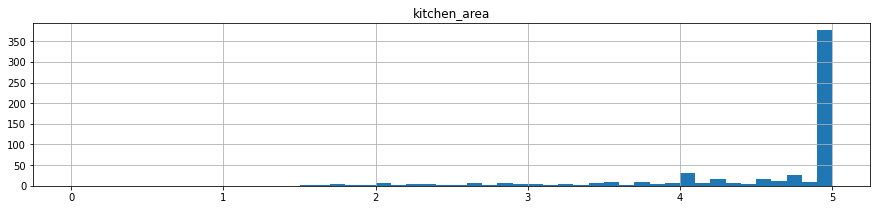

In [67]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

### Посчитайте и добавьте в таблицу новые столбцы

- Цена одного квадратного метра
- День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- Месяц публикации объявления
- Год публикации объявления
- Тип этажа квартиры (значения — «первый», «последний», «другой»)
- Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

#### Цена квадратного метра - `price_per_sqrMeter`

In [68]:
# Цена квадратного метра
try:
    data['price_per_sqrMeter'] = data['last_price'] / data['total_area']
    print('Средняя цена за кв.м:', data['price_per_sqrMeter'].mean())
except:
    print('Встретилась нулевая площадь')

Средняя цена за кв.м: 97854.01358371705


#### День недели, месяц и год публикации объявления

- `weekday_exposition`
- `month_exposition`
- `year_exposition`

In [69]:
# день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Этаж квартиры: первый, последний, другой - `floor_type`

In [70]:
# этаж квартиры; варианты — первый, последний, другой
data['floor_type'] = (data['floor']
                      .where(data['floor'] != 1
                             , 'первый')
                     )
data['floor_type'] = (data['floor_type']
                      .where((data['floor_type'] != data['floors_total']) 
                             | (data['floor_type']=='первый')
                             , 'последний')
                     )
data['floor_type'] = (data['floor_type']
                      .where((data['floor_type'] == 'первый') 
                             | (data['floor_type'] == 'последний')
                             , 'другой')
                     )

#### Соотношение жилой и общей площади - `living_area_rate`

In [71]:
# Соотношение площади кухни к общей
try:
    data['kitchen_area_rate'] = data['kitchen_area'] / data['total_area']
except:
    print('Ошибка. Нулевая общая площадь')

In [72]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sqrMeter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_type', 'kitchen_area_rate'],
      dtype='object')

#### Расстояние до центра города, округлённое до целых км

In [73]:
# cityCenters_nearest — расстояние до центра города (м)
# Создаем столбец cityCenter_km - расттояние в км
data['cityCenter_km'] = round(data['cityCenters_nearest'] / 1000, 0)
try:
    data['cityCenter_km'] = data['cityCenter_km'].astype(int)
except:
    print('Есть неконвертируемые значения.')
data['cityCenter_km'].head()

Есть неконвертируемые значения.


0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenter_km, dtype: float64

#### Итоговое описание столбцов таблицы

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

**Новые столбцы:**

`price_per_sqrMeter` - Цена квадратного метра  
`weekday_exposition` - День недели,  
`month_exposition` - месяц,  
`year_exposition` - и год публикации объявления  
`floor_type` - Этаж квартиры: первый, последний, другой  
`living_area_rate` - Соотношение жилой и общей площади  
`kitchen_area_rate` - Соотношение площади кухни к общей  
`cityCenter_km` - Расстояние до центра города, округлённое до целых км

### Проведите исследовательский анализ данных

#### Общая площадь

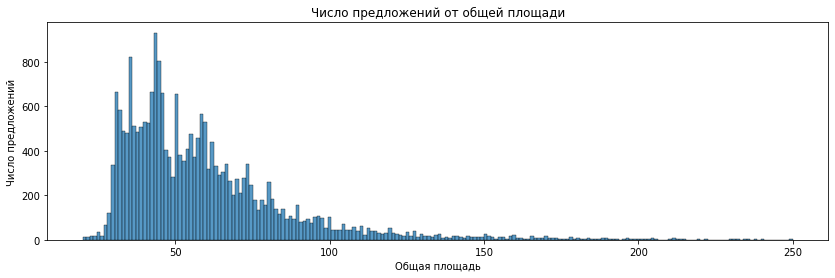

In [74]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации
hist = sns.histplot(data['total_area'], bins=200)
hist.set_title('Число предложений от общей площади')
hist.set_xlabel("Общая площадь", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)
plt.show()

In [75]:
data['total_area'].describe()

count    22726.000000
mean        59.201236
std         27.885920
min         20.000000
25%         40.600000
50%         52.195000
75%         69.600000
max        250.000000
Name: total_area, dtype: float64

График вытянут из-за незначительного числа предложений с большими площадями.  
Основные предложения уместились в диапазоне до 200 кв. метров.

Нельзя сказать, что квартиры с площадими больше 200 м - это некорректные данные. Такие данные могут быть корректными, но квартир с большой площадью предлагается мало. При проведении анализа стоимости квадратного метра для типичных квартир, такие данные нас вряд-ли заинтересуют, так как площади резко отличающиеся по размеру могут иметь другое ценообразование.  

Рассмотрим диапазон - до 200 кв. м

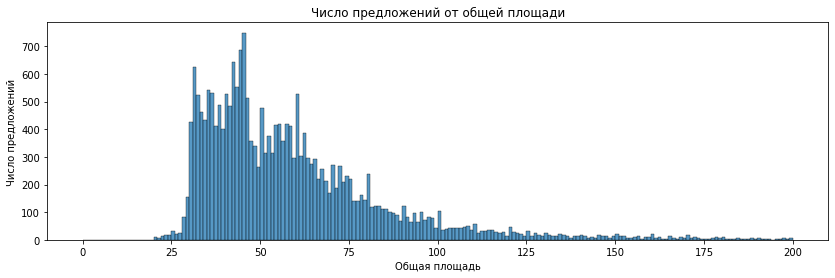

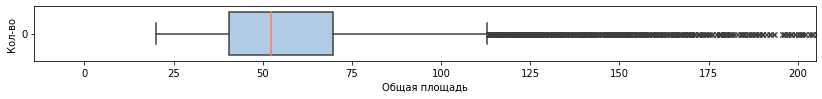

In [76]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации
hist = sns.histplot(data['total_area'], bins=200, binrange=(0,200))
hist.set_title('Число предложений от общей площади')
hist.set_xlabel("Общая площадь", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)
plt.show()

plt.rcParams['figure.figsize'] = (14, 1) # указываем размер визуализации
plt.xlim(-14, 205)
boxplot = sns.boxplot(data=data['total_area'], orient="h",
                      flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)},
                      medianprops={"color": "coral"},);
boxplot.set_xlabel("Общая площадь", fontsize=10)
boxplot.set_ylabel("Кол-во", fontsize=10)
plt.show()

#### Вывод

Медианное значение общей площади - около 52 кв. м.  
Основные предложения (50%) имеют площадь в диапазоне 40 кв. м ... 69 кв.м.  
Предложения с площадью более 150 кв. м редкие.  
Предложения с площадью менее 12 кв. м можно не приниматьь во внимание при анализе.

#### Жилая площадь

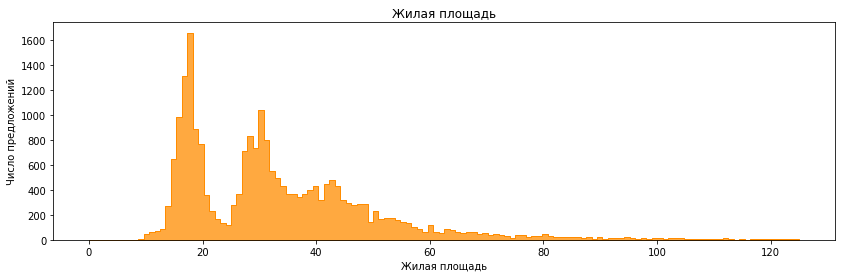

In [77]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации

hist = sns.histplot(data['living_area'], bins=130, binrange=(0,125), element="step", fill=True, color='darkorange')
hist.set_title('Жилая площадь')
hist.set_xlabel("Жилая площадь", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)
plt.show()

#### Вывод
В общих чертах характер распределения похож на общую площадь.  
Но мы можем наблюдать 3 пика и 3 провала. Например, первый из них в диапазоне от 19 до 26 кв. м.  
Эти пики обусловлены тем, что квартиры имеют дискретное количество комнат: 1, 2, 3 и более. И, при этом размер, комнат тяготет к "типовым" значениям.  
В данном случае, пики показывают наиболее распространненное количество комнат.   
С ростом площади вариаций становися больше и зависимость становится более равномерной.  
Наиболее типовые размеры жилой площади:  
- 1-комнатные - 17 - 19 кв. м
- 2-комнатные - 29 - 33 кв. м
- 3-комнатные - 40 - 45 кв. м

#### Площадь кухни

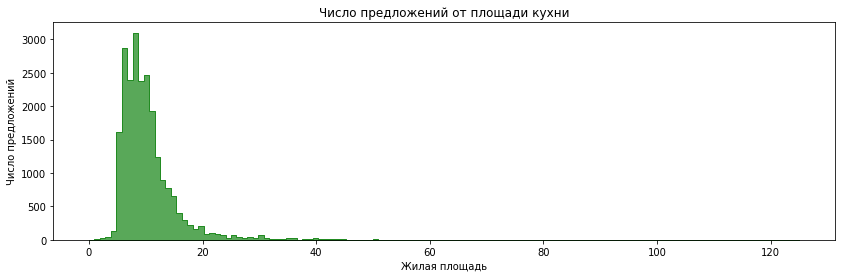

In [78]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации
hist = sns.histplot(data['kitchen_area'], bins=130, binrange=(0,125), element="step", fill=True, color='forestgreen')
hist.set_title('Число предложений от площади кухни')
hist.set_xlabel("Жилая площадь", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)
plt.show()

In [79]:
data['kitchen_area'].describe()

count    22726.000000
mean        10.218892
std          5.088593
min          1.560377
25%          7.000000
50%          9.000000
75%         11.600000
max         58.400000
Name: kitchen_area, dtype: float64

#### Вывод
Площадь кухни мало зависит от общей площади квартиры и стремится к типичному размеру.  
Медианное значение размера кухни - 9 кв. м.  
Выбросы около 0 - это заполненные значения для квартир, где предположительно отсутствует кухня, как отдельное помещение.

#### Совмещение графиков площадей: общей, жилой, площади кухни.

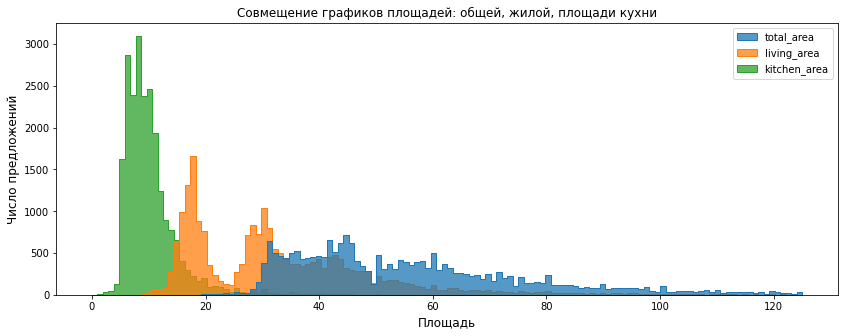

In [80]:
plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации
hist = sns.histplot(data[['total_area','living_area','kitchen_area']], bins=130, binrange=(0,125), element="step", fill=True)
hist.set_title('Совмещение графиков площадей: общей, жилой, площади кухни')
hist.set_xlabel("Площадь", fontsize=12)
hist.set_ylabel("Число предложений", fontsize=12)

plt.show()

#### Цена объекта

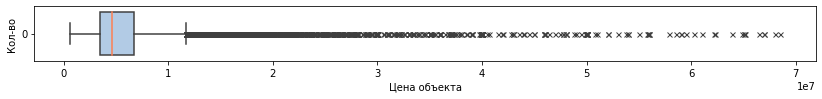

In [81]:
plt.rcParams['figure.figsize'] = (14, 1) # указываем размер визуализации

boxplot = sns.boxplot(data=data['last_price'], orient="h",
                      flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)},
                      medianprops={"color": "coral"},);
boxplot.set_xlabel("Цена объекта", fontsize=10)
boxplot.set_ylabel("Кол-во", fontsize=10)
plt.show()

In [82]:
data['last_price'].describe()

count    2.272600e+04
mean     6.057859e+06
std      5.204904e+06
min      6.000000e+05
25%      3.480000e+06
50%      4.650130e+06
75%      6.750000e+06
max      6.850000e+07
Name: last_price, dtype: float64

Цены выше 18 млн. руб. считаем выбросами... Эх, были времена...

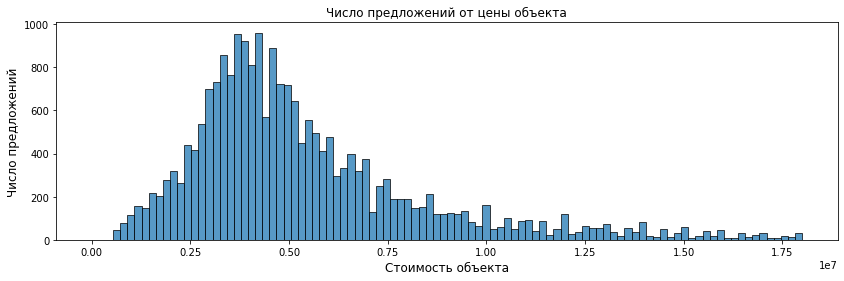

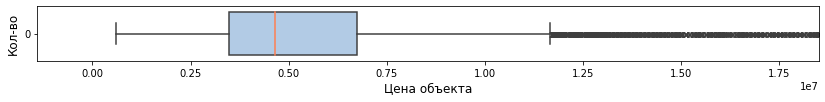

In [83]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации
hist = sns.histplot(data['last_price'], bins=100, binrange=(0,18000000))
hist.set_title('Число предложений от цены объекта')
hist.set_xlabel("Стоимость объекта", fontsize=12)
hist.set_ylabel("Число предложений", fontsize=12)
plt.show()

plt.rcParams['figure.figsize'] = (14, 1) # указываем размер визуализации
plt.xlim(-1400000, 18500000)
boxplot = sns.boxplot(data=data['last_price'], orient="h",
                      flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)},
                      medianprops={"color": "coral"},);
boxplot.set_xlabel("Цена объекта", fontsize=12)
boxplot.set_ylabel("Кол-во", fontsize=12)
plt.show()

#### Вывод
Правая часть графика сильно вытянута. Это можно объяснить наличием эксклюзивных предложений. Также, это соответствует и характеру распредения общей площади.  
Но, если обратить внимание на левую часть графика, то она более пологая, чем у общей площади. Видимо, в сегменте малых площадей более разнородная ситуация с ценовыми предложениями. Скорее всего типы таких пеомещений сильно отличаются.  
Медианная полная цена - 4,65 млн. руб.

#### Количество комнат

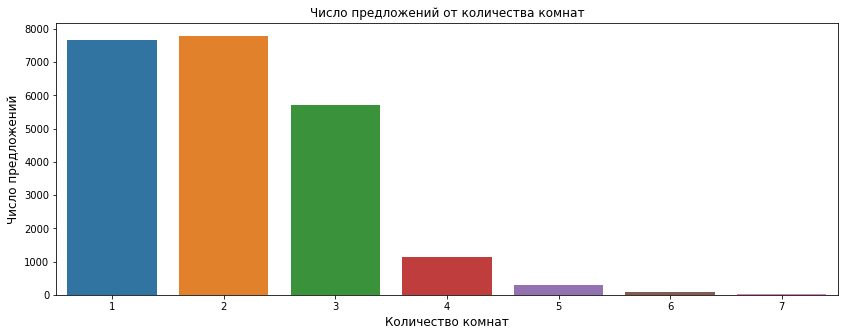

In [84]:
d = data.groupby('rooms')['rooms'].count()

plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации
hist = sns.barplot(x=d.index, y=d.values)
hist.set_title('Число предложений от количества комнат')
hist.set_xlabel("Количество комнат", fontsize=12)
hist.set_ylabel("Число предложений", fontsize=12)
plt.show()

#### Вывод

Как ранее было замечено - есть данные с числом комнат - 0. Такие данные нужно исключить из анализа.   
Самые популярные предложения: 1, 2, 3, 4- комнатные квартиры.  
Другие форматы встречаются существенно реже.

#### Высота потолков

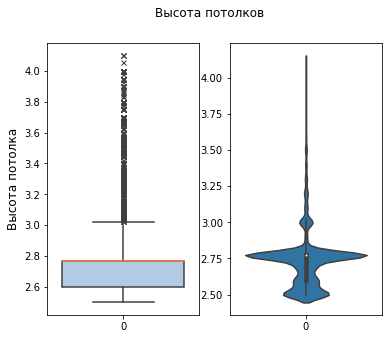

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))
fig.suptitle('Высота потолков')

boxplot = sns.violinplot(ax=axes[1], data=data['ceiling_height'])
boxplot = sns.boxplot(ax=axes[0], data=data['ceiling_height'], orient="v",
                      flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)},
                      medianprops={"color": "coral"},);
boxplot.set_ylabel("Высота потолка", fontsize=12)
plt.show()

In [86]:
data['ceiling_height'].describe()

count    22726.000000
mean         2.738729
std          0.200409
min          2.500000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.100000
Name: ceiling_height, dtype: float64

#### Выводы
На этапе поиска аномальных значений часть выбросов уже была удалена, а часть данных была откорректирована.  
Медианная высота потолков - **2.77** м  
Также, на графике есть несколько характерных пиков для наиболее распространённой высоты потолков:  
- 2.5 м
- 2.7 м
- 3.0 м

#### Этажи квартир

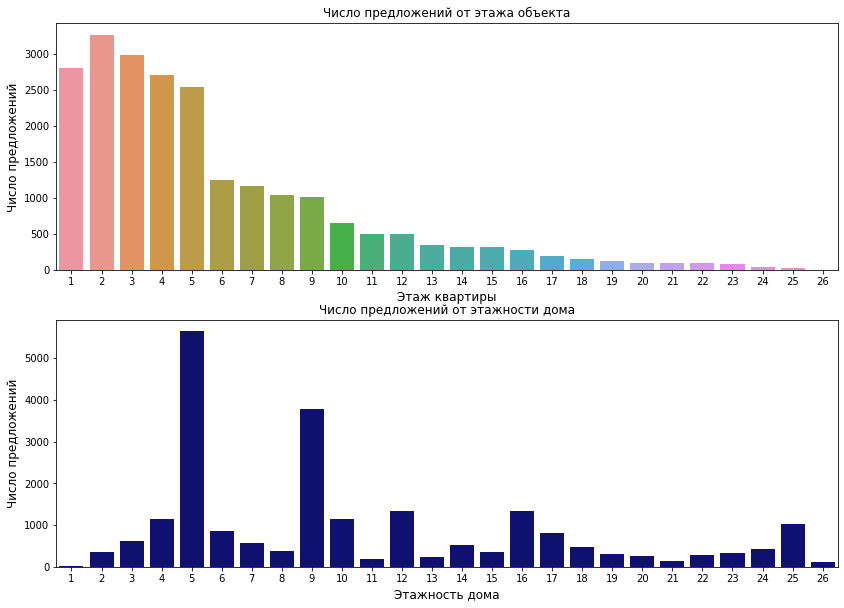

In [87]:
d = data.groupby('floor')['floor'].count()
d1 = data.groupby('floors_total')['floors_total'].count()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации
hist = sns.barplot(x=d.index, y=d.values, ax=axes[0])
hist.set_title('Число предложений от этажа объекта')
hist.set_xlabel('Этаж квартиры', fontsize=12)
hist.set_ylabel('Число предложений', fontsize=12)

plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации
hist = sns.barplot(x=d1.index, y=d1.values, ax=axes[1], color='navy')
hist.set_title('Число предложений от этажности дома')
hist.set_xlabel('Этажность дома', fontsize=12)
hist.set_ylabel('Число предложений', fontsize=12)

plt.show()

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Классные графики, молодец, четко видно все значения
          

#### Вывод
В лидерах предложений к продаже находятся 5-ти и 9-ти этажные дома.  
Также, можно предположить, что это, в основном, более старый фонд.  
В целом по рынку, самый большой выбор квартир, расположенных до 5-го этажа.

#### Тип этажа

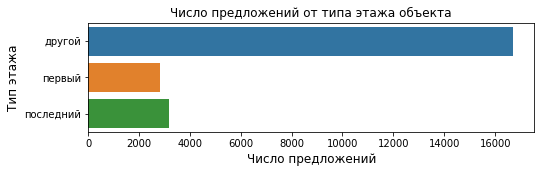

In [88]:
d = data.groupby('floor_type')['floor_type'].count()

plt.rcParams['figure.figsize'] = (8, 2) # указываем размер визуализации
hist = sns.barplot(x=d.values, y=d.index, orient='h')
hist.set_title('Число предложений от типа этажа объекта')
hist.set_xlabel("Число предложений", fontsize=12)
hist.set_ylabel("Тип этажа", fontsize=12)
plt.show()

#### Вывод
Ожидаемо, предложения в категории "другой" этаж примерно в 6 раз больше, чем для категорий "первый" или "последний".   
Интересным наблюдением является то, что предложений на первом этаже оказалось меньше, чем на последнем, хотя количество предложений на первом этаже в лидерах.

#### Расстояние до центра города

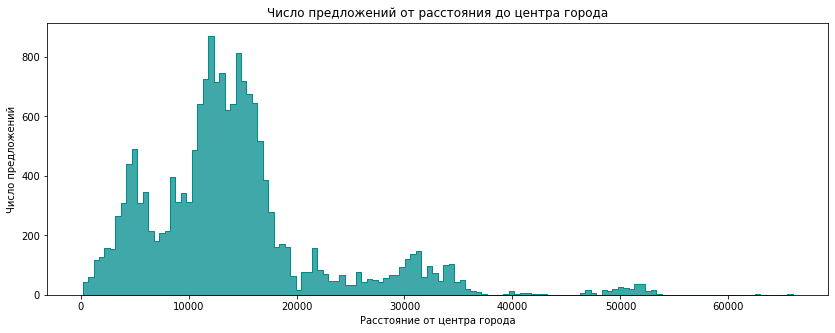

In [89]:
plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации

hist = sns.histplot(data['cityCenters_nearest'], bins=130, element="step", fill=True, color='darkcyan')
hist.set_title('Число предложений от расстояния до центра города')
hist.set_xlabel("Расстояние от центра города", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)

plt.show()

#### Вывод
Медианное значение на котором расположены предложения - 13 км.  
Большинство предложений в диапазоне от 9 до 16 км.  
После 16 км от города появляется резкий спад в количестве предложений.  
Также является примечательным спад в количестве предложений от 8 до 11 км.

#### Расстояние до ближайшего парка

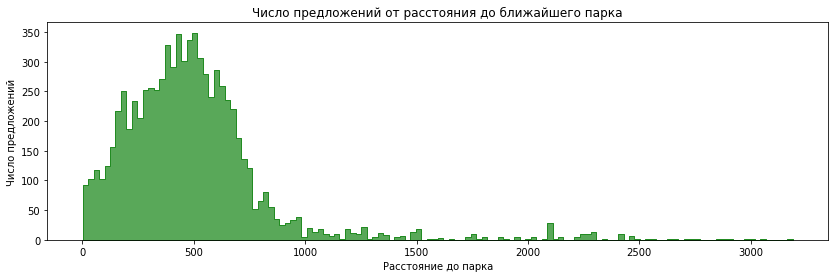

In [91]:
plt.rcParams['figure.figsize'] = (14, 4) # указываем размер визуализации

hist = sns.histplot(data['parks_nearest'], bins=130, element="step", fill=True, color='forestgreen')
hist.set_title('Число предложений от расстояния до ближайшего парка')
hist.set_xlabel("Расстояние до парка", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)

plt.show()

#### Вывод
Информацию о расстоянии до парка указывают, если расстояние до парка меньше 1 км.  
Большинство таких квартир в 500 м от парка.

#### Расстояние до ближайшего аэропорта

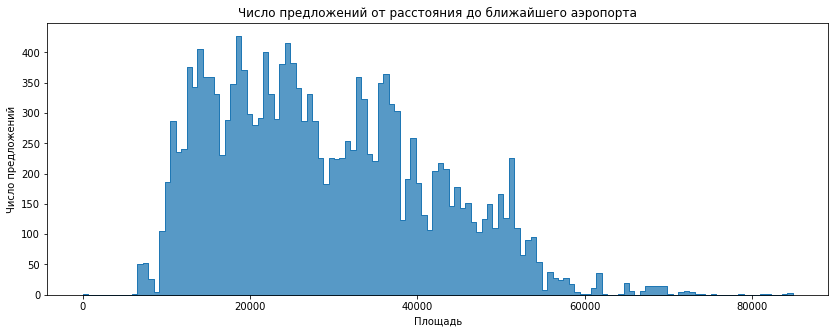

In [92]:
plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации

hist = sns.histplot(data['airports_nearest'], bins=130, element="step", fill=True)
hist.set_title('Число предложений от расстояния до ближайшего аэропорта')
hist.set_xlabel("Площадь", fontsize=10)
hist.set_ylabel("Число предложений", fontsize=10)

plt.show()

#### Вывод
Здесь сложно сделать какие-то выводы. Распределение выглядит вполне обоснованным.  
Квартиры в 10 километровой зоне от аэропорта вполне могут быть, но количествао предложений там невелико.  

#### День и месяц публикации объявления


Число размещённых объявлений в зависимости от дня недели.

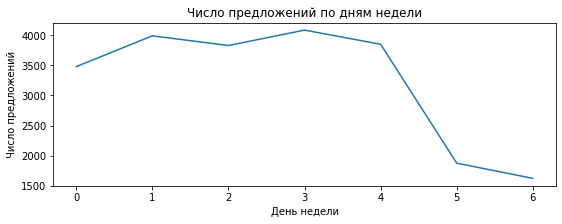

In [93]:
d = data.groupby('weekday_exposition')['weekday_exposition'].count()

plt.rcParams['figure.figsize'] = (9, 3) # указываем размер визуализации

gr = sns.lineplot(data=d, x=d.index, y=d.values, dashes=True, markers=True)
gr.set_title('Число предложений по дням недели')
gr.set_xlabel("День недели", fontsize=10)
gr.set_ylabel("Число предложений", fontsize=10)

plt.show()

Число размещённых объявлений в зависимости от месяца.

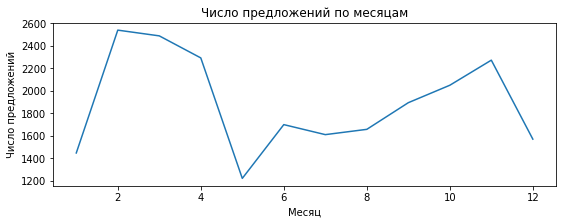

In [94]:
d = data.groupby('month_exposition')['month_exposition'].count()

plt.rcParams['figure.figsize'] = (9, 3) # указываем размер визуализации

gr = sns.lineplot(data=d, x=d.index, y=d.values, dashes=True, markers=True)
gr.set_title('Число предложений по месяцам')
gr.set_xlabel("Месяц", fontsize=10)
gr.set_ylabel("Число предложений", fontsize=10)

plt.show()

Число размещённых объявлений в зависимости от года.

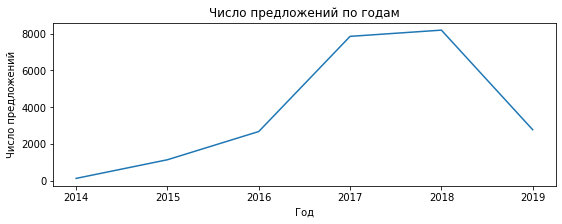

In [95]:
d = data.groupby('year_exposition')['year_exposition'].count()

plt.rcParams['figure.figsize'] = (9, 3) # указываем размер визуализации

gr = sns.lineplot(data=d, x=d.index, y=d.values, dashes=True, markers=True)
gr.set_title('Число предложений по годам')
gr.set_xlabel("Год", fontsize=10)
gr.set_ylabel("Число предложений", fontsize=10)

plt.show()

#### Вывод
- Суббота и воскресенье - активность размещения объявлений значительно ниже.
- Май - самый неактивный месяц для размещения объявлений. Летом, объявлений размещается меньше.
- С 2014 до 2019 года растёт количество размещённых объявлений. Данные за 2019 год, вероятно, не полные. (Могут влиять на статистику по месяцам)


#### Как быстро продаются квартиры

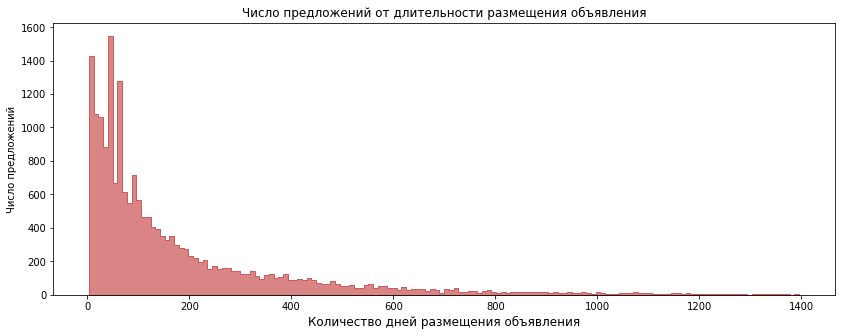

In [96]:
plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации

hist = sns.histplot(data['days_exposition'], bins=150, element="step", fill=True, color='indianred')
hist.set_title('Число предложений от длительности размещения объявления')
hist.set_xlabel("Количество дней размещения объявления", fontsize=12)
hist.set_ylabel("Число предложений", fontsize=10)
plt.show()

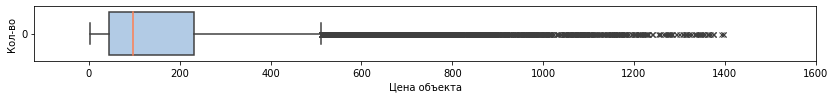

In [97]:
plt.rcParams['figure.figsize'] = (14, 1) # указываем размер визуализации
plt.xlim(-120, 1600)
boxplot = sns.boxplot(data=data['days_exposition'], orient="h",
                      flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)},
                      medianprops={"color": "coral"});
boxplot.set_xlabel("Цена объекта", fontsize=10)
boxplot.set_ylabel("Кол-во", fontsize=10)
plt.show()

In [98]:
data['days_exposition'].describe()

count    19663.000000
mean       180.109597
std        216.443607
min          3.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1396.000000
Name: days_exposition, dtype: float64

Большинство квартир продаются (или размещено объявление) от 45 до 232 дня.  
Посмотрим диапазон до 250 дней.

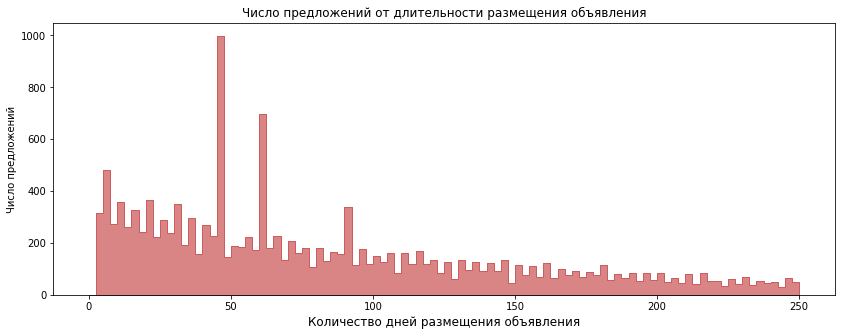

In [99]:
plt.rcParams['figure.figsize'] = (14, 5) # указываем размер визуализации

hist = sns.histplot(data['days_exposition'], bins=100, element="step", fill=True, color='indianred', binrange=(0,250))
hist.set_title('Число предложений от длительности размещения объявления')
hist.set_xlabel("Количество дней размещения объявления", fontsize=12)
hist.set_ylabel("Число предложений", fontsize=10)

plt.show()

Есть выбросы.

In [100]:
data.query('days_exposition > 43 and days_exposition < 49').groupby('days_exposition')['last_price'].agg('count')

days_exposition
44.0    123
45.0    835
46.0     86
47.0     77
48.0     77
Name: last_price, dtype: int64

In [101]:
data.query('days_exposition > 55 and days_exposition < 62').groupby('days_exposition')['last_price'].agg('count')

days_exposition
56.0     81
57.0     73
58.0     70
59.0    102
60.0    525
61.0    106
Name: last_price, dtype: int64

In [102]:
data.query('days_exposition > 87 and days_exposition < 92').groupby('days_exposition')['last_price'].agg('count')

days_exposition
87.0     39
88.0     64
89.0     93
90.0    194
91.0     68
Name: last_price, dtype: int64

#### Вывод
Большинство квартир продаются (или размещено объявление) от 45 до 232 дня (от ~1.5 мес. до ~8 мес.).  
- Необычно быстрыми продажами стоит считать продажи быстрее, чем за 45 дней.  
- Долгие продажи - более 230-250 дней.

Обнаружены выбросы в районе 45, 60, 90 дня. Вероятно, это какая-то техническая особенность, связанная с автоматическим снятием объявлений.

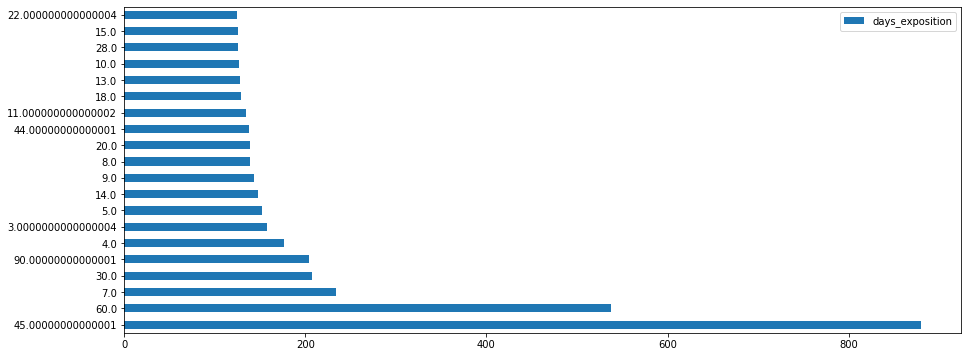

In [103]:
# check
# Моды на реальных данных
     
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

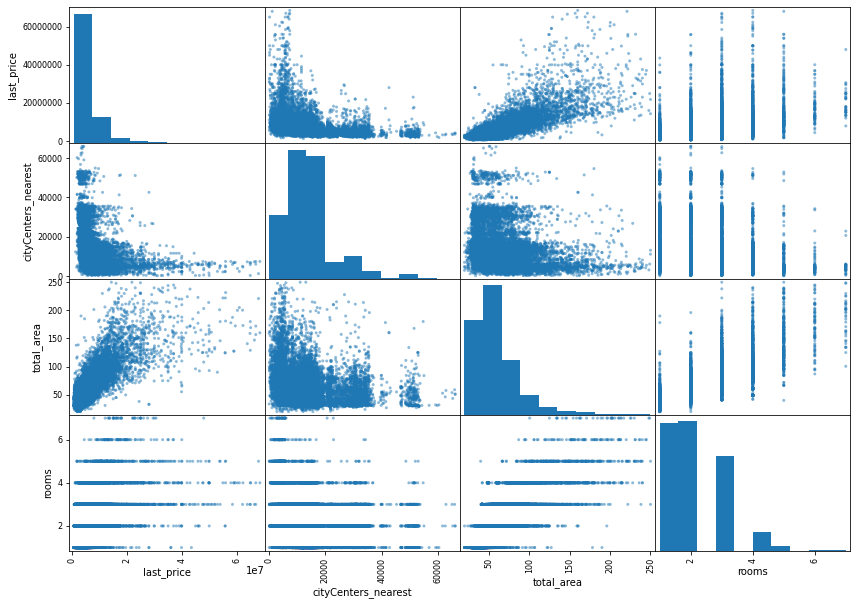

In [104]:
data_stat = data[['last_price','cityCenters_nearest','total_area','rooms','floor_type']]
pd.plotting.scatter_matrix(data_stat, figsize=(14, 10));

**Выводы по матрице рассеяния:**

- Стоимость от общей площади:

Стоимость квартиры с маленькой площадью очень пропорциональна площади.  
Для предложений с площадью больше примерно 120 кв. м стоимость может варьироваться сильнее, но зависимость сохраняется.

- Стоимость от расстояния до центра:

В зоне до 19 км наибольшее число предложений и стоимость может варьироваться больше. Для более удаленных квартир от центра цена зависит от расстояния меньше.

- Стоимость от количества комнат:  
Наибольшее количество предложений разделяют 1 и 2-х комнатные квартиры. Стоимость квадратного метра в квартирах с меньшим числом комнат больше, и убывает с возрастанием числа комнат. Разброс цен меньше для 1, 2-комнатных квартир и больше для многокомнатных.

#### Стоимость от общей площади

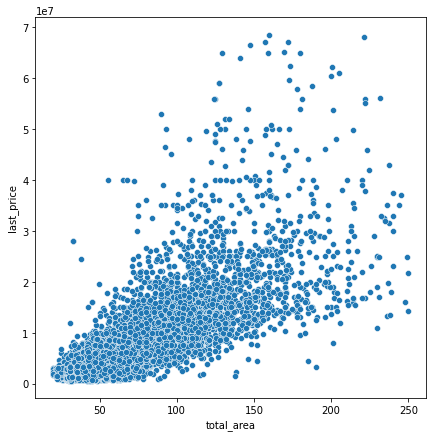

In [105]:
# Зависимость стоимости от общей площади
plt.rcParams['figure.figsize'] = (7, 7) # указываем размер визуализации
sns.scatterplot(data=data, x='total_area', y='last_price')
plt.show()

Рассмотрим более характериный диапазон.

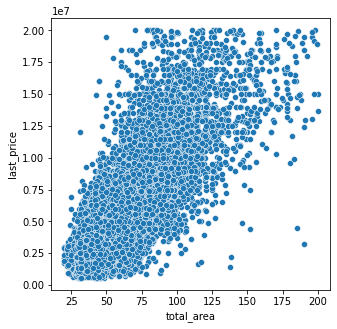

In [106]:
d = data.query('total_area <=200 and last_price <= 20000000')[['total_area', 'last_price']]
plt.rcParams['figure.figsize'] = (5, 5) # указываем размер визуализации
sns.scatterplot(data=d, x='total_area', y='last_price')
plt.show()

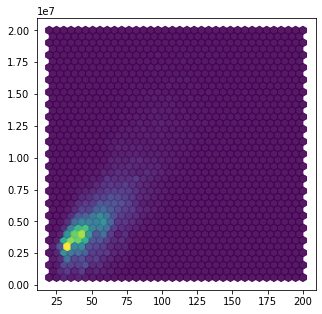

In [107]:
fig, ax = plt.subplots()
ax.hexbin(data=d, x='total_area', y='last_price', gridsize = 35, alpha = 0.9)

In [108]:
print('Корреляция Общей стоимости квартиры и Общей площади: {0:.4f}'.format(data['last_price'].corr(data['total_area'])))

Корреляция Общей стоимости квартиры и Общей площади: 0.7596


In [109]:
print('Корреляция Цены кв. метра и Общей площади: {0:.4f}'.format(data['price_per_sqrMeter'].corr(data['total_area'])))

Корреляция Цены кв. метра и Общей площади: 0.2320


#### Вывод
Цена квартиры средне коррелирует с её общей площадью (Коэффициент Пирсона = 0.6537).  
Цена квадратного метра слабо коррелирует с её общей площадью (Коэффициент Пирсона = 0.3029).

#### Зависимость от жилой площади

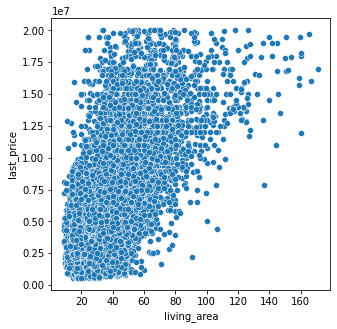

In [110]:
# Зависимость стоимости от общей площади
d = data.query('living_area <=200 and last_price <= 20000000')[['living_area', 'last_price']]
plt.rcParams['figure.figsize'] = (5, 5) # указываем размер визуализации
sns.scatterplot(data=d, x='living_area', y='last_price')
plt.show()

In [111]:
print('Корреляция Цены квартиры и Жилой площади: {0:.4f}'.format(data['last_price'].corr(data['living_area'])))

Корреляция Цены квартиры и Жилой площади: 0.6643


#### Вывод
Стоимость квартиры средне коррелирует с размером жилой площади.  (Коэффициент Пирсона = 0.5864)

#### Зависимость от площади кухни

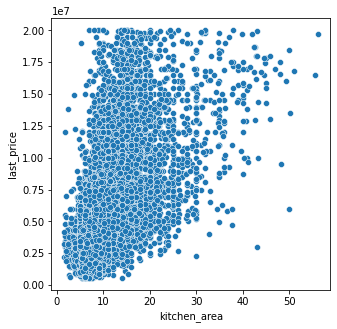

In [112]:
# Зависимость стоимости от общей площади
d = data.query('kitchen_area <=80 and last_price <= 20000000')[['kitchen_area', 'last_price']]
plt.rcParams['figure.figsize'] = (5, 5) # указываем размер визуализации
sns.scatterplot(data=d, x='kitchen_area', y='last_price')
plt.show()

In [113]:
print('Корреляция Цены квартиры и площади кухни: {0:.4f}'.format(data['last_price'].corr(data['kitchen_area'])))

Корреляция Цены квартиры и площади кухни: 0.5779


#### Вывод
Стоимость квартиры ниже среднего коррелирует с размером кухни.  (Коэффициент Пирсона = 0.4819)

#### Зависимость стоимости от количества комнат

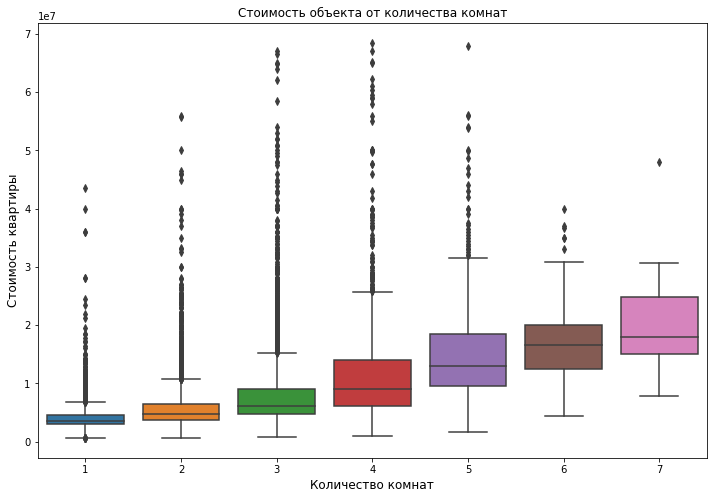

In [114]:
# Зависимость стоимости от общей площади
d = data[['rooms', 'last_price']]
plt.rcParams['figure.figsize'] = (12, 8) # указываем размер визуализации
gr = sns.boxplot(data=d, x='rooms', y='last_price')
gr.set_title('Стоимость объекта от количества комнат')
gr.set_xlabel("Количество комнат", fontsize=12)
gr.set_ylabel("Стоимость квартиры", fontsize=12)
plt.show()

Ограничим область рассмотрения цены и количества комнат.

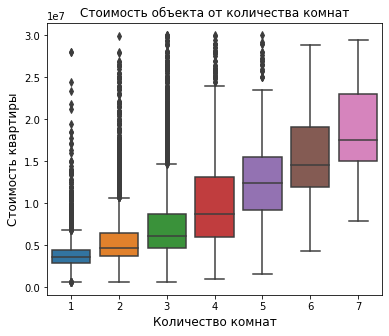

In [115]:
# Зависимость стоимости от количества комнат
d = data.query('rooms < 8 and last_price < 30000000')[['rooms', 'last_price']]
plt.rcParams['figure.figsize'] = (6, 5) # указываем размер визуализации
gr = sns.boxplot(data=d, x='rooms', y='last_price')
gr.set_title('Стоимость объекта от количества комнат')
gr.set_xlabel("Количество комнат", fontsize=12)
gr.set_ylabel("Стоимость квартиры", fontsize=12)
plt.show()

In [116]:
print('Корреляция Цены квартиры и количества комнат: {0:.4f}'.format(data['last_price'].corr(data['rooms'])))

Корреляция Цены квартиры и количества комнат: 0.4661



#### Вывод

Количество предложений 1, 2, 3- комнтаных квартир самое большое. Но при этом разброс цен здесь меньше, чем для кварти с 4 и более комнатами.  
Корреляция цены квартиры и количества комнат: 0.3634

#### Зависимость стоимости от этажа, на котором расположена квартира (первый, последний, другой)

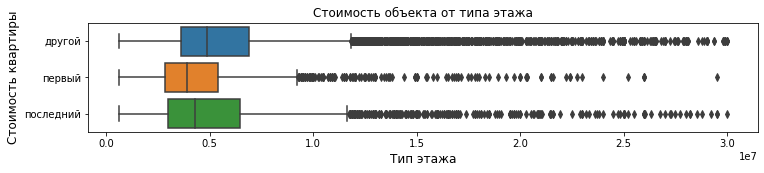

In [117]:
# Зависимость стоимости от общей площади
d = data.query('last_price < 30000000')[['floor_type', 'last_price']]
plt.rcParams['figure.figsize'] = (12, 2) # указываем размер визуализации
gr = sns.boxplot(data=d, x='last_price', y='floor_type')
gr.set_title('Стоимость объекта от типа этажа')
gr.set_xlabel("Тип этажа", fontsize=12)
gr.set_ylabel("Стоимость квартиры", fontsize=12)
plt.show()

#### Вывод
Аутсайдет по стоимости - квартира на первом этаже. В среднем цена таких квартир ниже и меньше разброс в цене такой квартиры.  
Квартира на последнем этаже имеет самый широкий разброс стоимости и может не уступать квартире на другом этаже, хотя, в среднем цена квартиры на другом этаже ниже.  

#### Зависимость стоимости от даты размещения (день недели, месяц, год)

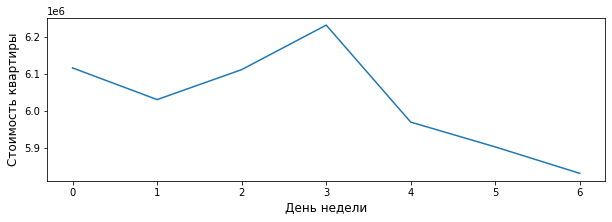

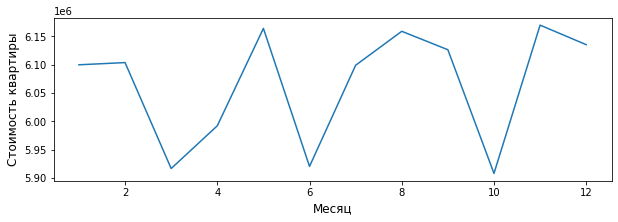

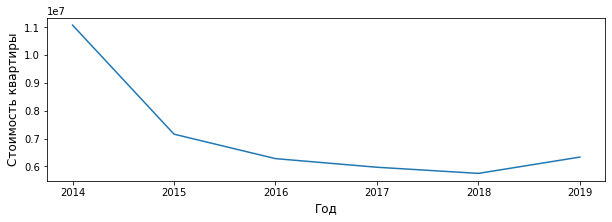

In [118]:
a_list = {'weekday_exposition' : 'День недели',
          'month_exposition' : 'Месяц',
          'year_exposition' : 'Год'
         }

plt.rcParams['figure.figsize'] = (10, 3) # указываем размер визуализации

for param in a_list:
    d = data.pivot_table(index=param, values='last_price', aggfunc='mean')

    gr = sns.lineplot(data=d, x=param, y='last_price', dashes=True, markers=True)
    gr.set_xlabel(a_list[param], fontsize=12)
    gr.set_ylabel("Стоимость квартиры", fontsize=12)

    plt.show()


**Взаимное влияние средней цены и средней площади в течение лет.**  
Средняя стоимость размещенных объявлений уверенно снижалась с 2014 по 2018 год, а затем снова начала расти.  
(Данные за 2019 год могут быть не полными).  
Это говорит скорее всего о том, что в эти годы росло количество предложений в более дешёвом сегменте.  
Для проверки посмотрим влияение средней площади квартиры в течение лет.

In [119]:
d = data.pivot_table(index='year_exposition', aggfunc={'last_price':'mean','total_area':'mean'})
d

,last_price,total_area
year_exposition,,
2014,1.107252e+07,83.576885
2015,7.157406e+06,67.673961
2016,6.279241e+06,61.092059
2017,5.969646e+06,59.366664
2018,5.749162e+06,57.344216
2019,6.334674e+06,57.846767


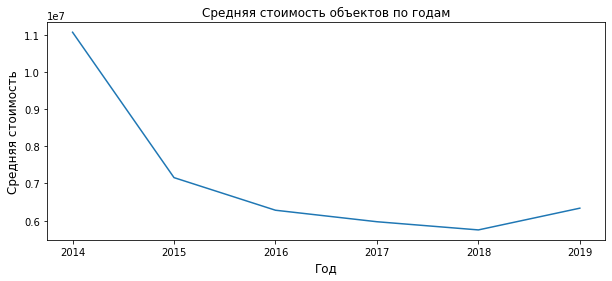

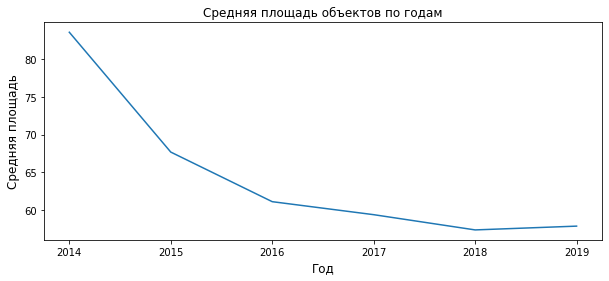

In [120]:
plt.rcParams['figure.figsize'] = (10, 4) # указываем размер визуализации

hist = sns.lineplot(data=d['last_price'])
hist.set_title('Средняя стоимость объектов по годам')
hist.set_xlabel("Год", fontsize=12)
hist.set_ylabel("Средняя стоимость", fontsize=12)
plt.show()

hist = sns.lineplot(data=d['total_area'])
hist.set_title('Средняя площадь объектов по годам')
hist.set_xlabel("Год", fontsize=12)
hist.set_ylabel("Средняя площадь", fontsize=12)
plt.show()

In [121]:
# Корреляция между стоимостью квартир и мредней площадью по годам.
print(d['last_price'].corr(d['total_area']))

0.9823481796942105


In [122]:
d['total_area'].apply (['count', 'min', 'max', 'median'])

count      6.000000
min       57.344216
max       83.576885
median    60.229362
Name: total_area, dtype: float64

#### Вывод
В среду размещают самый дорогие объявления, а в воскресенье самые дешевые.  
Самые дорогие объявления размещают в мае, августе, декабре, а самые дешевые в марте, июне, ноябре.  

Средняя стоимость размещенных объявлений уверенно снижалась с 2014 по 2018 год, а затем снова начала расти.  
(Данные за 2019 год могут быть не полными).  
Установлено, что между средней площадью квартир и стоимостью есть сильная корреляция.  
Средняя площаь предложений уверенно снижается с годами (с 83 кв. м в 2014 году до 57 кв. м в 2018)


#### 10 населённых пунктов с наибольшим числом объявлений

In [123]:
# Список 10 локаций с набольшим числом обявлений
data_top10 = (data
              .groupby('locality_name')
              .agg({'last_price':'count'})
              .rename(columns = {'last_price':'qty'})
              .sort_values(by= 'qty', ascending= False)
              .reset_index()
             )
locality_top10 = data_top10['locality_name'].head(10).array
data_top10['locality_name'] = (data_top10['locality_name']
                               .where(data_top10['locality_name'].isin(locality_top10)
                                      ,'Другие')
                              )
data_top10 = (data_top10
              .groupby('locality_name')
              .agg({'qty':'sum'})
              .sort_values(by= 'qty', ascending= False)
)
data_top10

,qty
locality_name,
Санкт-Петербург,15162
Другие,4370
поселок Мурино,461
поселок Шушары,431
деревня Кудрово,427
Всеволожск,386
Пушкин,354
Колпино,334
Гатчина,307


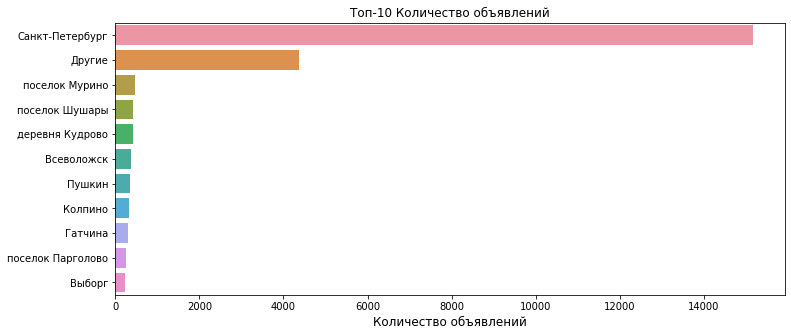

In [124]:
plt.rcParams['figure.figsize'] = (12, 5) # указываем размер визуализации
hist = sns.barplot(data=data_top10, x='qty', y=data_top10.index, orient='h')
hist.set_title('Топ-10 Количество объявлений')
hist.set_ylabel('')
hist.set_xlabel("Количество объявлений", fontsize=12)
plt.show()

#### Вывод
Среди "топ-10" населенных пунктов по числу объявлений наибоее высокая средная цена за квадратный метр в Санкт-Петербурге = 114825 Руб. за кв. м.

На 10-й позиции Выборг с средней ценой 58238 Руб. за кв. метр.

#### Зависимость стоимости квартиры от расстояния до центра Санкт-Петербурга

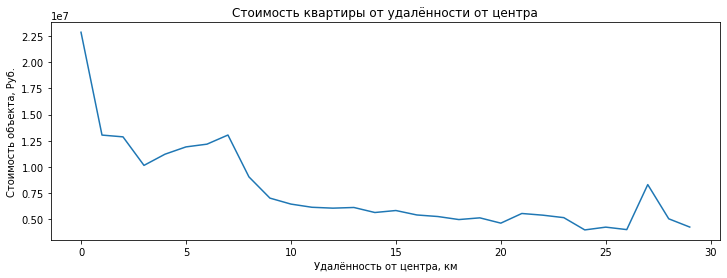

In [125]:
# Нас интересуют только данные в Санкт-Петербурге и не с нулевой ценой и ненулевой площадью
data_spb = (data
            .query('locality_name == "Санкт-Петербург" and last_price > 0 and total_area > 0')
           )[['locality_name','cityCenter_km','last_price']]

data_spb = (data_spb
     .pivot_table(index='cityCenter_km', values='last_price',aggfunc='mean')
)

plt.rcParams['figure.figsize'] = (12, 4) # указываем размер визуализации

gr = sns.lineplot(data=data_spb, x='cityCenter_km', y='last_price', dashes=True, markers=True)
gr.set_title("Стоимость квартиры от удалённости от центра")
gr.set_xlabel("Удалённость от центра, км", fontsize=10)
gr.set_ylabel("Стоимость объекта, Руб.", fontsize=10)

plt.show()

На 27 км есть неожиданный пик с высокой ценой.

In [126]:
data.query('locality_name == "Санкт-Петербург" and cityCenter_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqrMeter,weekday_exposition,month_exposition,year_exposition,floor_type,kitchen_area_rate,cityCenter_km
748,13,14350000.0,74.0,2017-11-28,2,3.130000,5,30.0,3,False,...,0.0,NaN,128.0,193918.918919,1,11,2017,другой,0.337838,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.771499,2,16.5,2,False,...,0.0,NaN,178.0,70312.500000,1,2,2018,последний,0.218750,27.0


На участке 27 км всего 2 записи и одна из них имеет цену более 14 млн.  
Эта запись привела к возникновению пика.  
Слишком малое количество данных не даёт возможность оценить корректно.

In [127]:
print('Корреляция Стоимости квартиры и расстояния от центра: {0:.4f}'
      .format(data_spb['last_price'].corr(data['cityCenters_nearest'])))

Корреляция Стоимости квартиры и расстояния от центра: -0.0528


In [128]:
d = (data[['locality_name','cityCenter_km','floor_type']]
     .query('locality_name == "Санкт-Петербург" and cityCenter_km >= 2 and cityCenter_km <= 8')
     .pivot_table(index='cityCenter_km', columns='floor_type', aggfunc={'floor_type':'count'})
    )

d['total'] = d['floor_type']['первый'] + d['floor_type']['последний'] + d['floor_type']['другой']
d['first_rate'] = d['floor_type']['первый'] / d['total']
d['last_rate'] = d['floor_type']['последний'] / d['total']
d['other_rate'] = d['floor_type']['другой'] / d['total']
d.style.format("{:,.2f}")

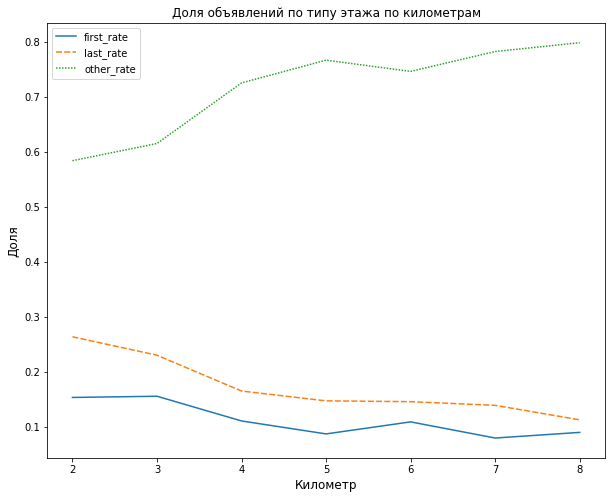

In [129]:
plt.rcParams['figure.figsize'] = (10, 8) # указываем размер визуализации
hist = sns.lineplot(data=d[['first_rate','last_rate','other_rate']])
hist.set_title('Доля объявлений по типу этажа по километрам')
hist.set_xlabel("Километр", fontsize=12)
hist.set_ylabel("Доля", fontsize=12)

plt.show()

#### Вывод
Самое быстрое снижение стоимости происходит на участке от 0 км до 9 км. Затем, идет переход на очень плавное снижение.
Средняя стоимость квартиры на этом участке снижается с 23.44 млн. руб. до 6.43 млн. руб.  

На 3 км наблюдается провал в стоимости, а, затем, до 7-го км идёт рост. Это объясняется тем, что на 2, 3, 4 км от центра выше доля предложений квартир на 1-м и на последнем этаже. А такие типы квартир имеют более низкую стоимость за квадратный метр, что влияет и на общую стоимость.

Небольшой провал на значении 0 км может говорить о том, что некоторе данные заполнены 0, но фактически, могу означать пропуск.

Зависимость стоимости кв. м от расстояни до центра оценивается как очень слабая. Коэффициент Пирсона = -0.0528

### Общий вывод

#### Общая информация о данных

Данные содержат **23699** записей в 22 столбцах. (Наименования столбцов - ok.)

В таблице есть пропущенные значения (NaN) - 14 столбцов:  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)  
- `cityCenters_nearest` — расстояние до центра города (м)  
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)  
 
Есть необходимость в преобразовании типа:  
- `first_day_exposition` -  object в date_time
- `floors_total` - float64 в int
- `is_apartment` - object в bool
- `balcony` - float64 в int
- `parks_around3000` - float64 в int
- `ponds_around3000` - float64 в int
- `days_exposition` - float64 в int  

Есть аномальные значения: 
- `ceiling_height` — высота потолков (м) - максимальное значение порядка 14000 м, что аномально.

***Симметричность пропусков***  
В столбцах `parks_around3000`, `ponds_around3000` - одинкаовое число пропусков.  
На 1 пропуск больше в столбце `cityCenters_nearest` и похожее число пропусков у `airport_nearest` и эти пропуски также совпадают с предыдущими.

#### Пропущенные значения
_1) Значения, которые нельзя восстановить:_  
- `locality_name` - 0.2%.  
Эти значения не связаны с другими данными. Средние или типовые значения здесь не подходят.  
49 значений заполнено названием "Неизвестно".

_2) Значения, пропуски в которых скорее всего тяготеют к одному из типовых значений "по умолчанию":_
- `is_apartment` - 88.3%
Пропущено **20924**	значений, **88.3%** данных.  
Данные этого столбца никак не связаны с другими столбцами, т.е. по другим данным нельзя откорректировать этот столбец. 
Наиболее вероятной причиной пропусков является принадлежность недвижимости к наиболее распространённому типу - жилые помещения, т.е. не являющиеся аппартаментами.
20924 значений заполнено False.

- `balcony` - 48.6%  
Доля пропусков этих значений самая высокая, но заполнить её корректными наиболее вероятными значениями возможно.
Наиболее веротяной причиной пропуска является отсутствие балкона у квартиры, поэтому это значение осталось незаполненым. 
11519 значений заполнено 0.

_3) Значения, которые взаимосвязаны и могут быть пропущены для определенных категорий:_
- `living_area` - 8%
- `kitchen_area` - 9.6%  
Заполнение пропусков производилось в зависимости от количества комнат в квартире. Расчитывалась пропорция от медианного значения площади квартир с соответствующим числом комнат.  

Заполнены 1903 пропусков жилой площади.  
Заполнены 2278 пропусков площади кухни.

_4) Значения, которые можно заменить на средние, медианные:_

- `ceiling_height` - 38.8 %  
9195 пропущенных значений заполнены средним значением по Санкт-Петербургу - 2.77 м.

- `floors_total` - 0.4 %  
Доля пропущенных значений не велика.  
Для корректного заполнения можно использовать информацию об этаже, на котором расположена квартира.  
86 пропуском общего числа этажей заполнены либо выбранным на основе расчётов медианным значением этажности - 9 (для низких этажей), либо ближайшим большим значением из списка встречающихся в данных этажностей домов (случай, когда этаж квартиры больше выбранного медианнного).

- `days_exposition` - 13.4%  
Доля пропущенных значений значительна.  
Можно предположить, что выгрузка содержит не только уже проданные квартиры, но и те, что еще остаются в продаже и это является причиной неполнения данных.  
3181 значений оставлены без изменения, т.к. вероятнее всего означают незакрытые объявления. Соответственно, попытка их заполения может привести к искажению результата.  

_5) Географические данные, которые можно попробовать заполнить:_  
- `cityCenters_nearest` - 23.3%
- Было пропущенных значений: 5519
- Удалось заполнить средними значениями по населенному пункту, для 10 нас. пунктов: 133 значений.
- 5386 остались не заполннеными.  

- Из 365 населённых пунктов пропуски в 346. Это почти все имеющиеся населенный пункты в данных.  

Данные о расстоянии заполнены на приемлемом уровне для проведения анализа только для 7 населённых пунктов:  
Колпино, Пушкин, Санкт-Петербург, Ломоносов, посёлок Шушары, Кронштадт, Красное Село.  
Это означает, что анализ данных, связанный с расстоянием до центра Санк-Петербурга возможно провести только для этих 7 населённых пунктов.

_6) Следующие данные сложные для восстановлени и не требуются для получения ответов напоставленные вопросы:_  

- `airports_nearest` - 5542 пропусков, 23.4%
- `parks_around3000` - 5518 пропусков, 23.3%
- `parks_nearest` - 65.9%
- `ponds_around3000` - 5518 пропусков, 23.3%
- `ponds_nearest` - 14589 пропусков, 61.6%  
  
Эти данные оставлены не заполненными.  

#### Типы данных
- first_day_exposition - день публикации объявления.  
Тип изменён на datetime.

- is_apartment - апартаменты.  
После заполнения данных восстановлен тип bool.

Сконвертироваы в тип int:  
- floors_total - сконвертирован в int
- balcony - сконвертирован в int
- cityCenters_nearest - сконвертирован в int

Оставлен тип float, т.к. остались пропущенные значения типа NaN:  
- airports_nearest - Есть неконвертируемые значения.
- parks_around3000 - Есть неконвертируемые значения.
- parks_nearest - Есть неконвертируемые значения.
- ponds_around3000 - Есть неконвертируемые значения.
- ponds_nearest - Есть неконвертируемые значения.
- days_exposition - Есть неконвертируемые значения.  

#### Дубликаты

Явных дубликатов не обнаружено.  
Количество уникальных наименований после очистки сократилось с 365 до 317.  
Таким образом, устранили **48** неявных дубликатов в названиях населённых пунктов.

#### Аномальные значения

Удалили **25** аномальных значений ceiling_height.  
Откорректировали **20** аномальных значений ceiling_height.  

Обнаружены аномальные значения `rooms` - количество комнат со значеним 0.  
**197** значений.
Эти значения отфильтрованы, при отфильтровке выбивающихся значений.

Считаем редкими следующие значения:
- `rooms` - Количество комнат в квартире: более 7-ми комнат.
- `total_area` - Общая площадь: менее 20-ти и более 250-ти квадратных метров
- `ceiling_height` - Высота потолков: менее 2,5 и более 4.1 м
- `days_exposition` - Количество дней экспозиции: менее 3 и более 1400
- `last_price` - Стоимость объекта: менее 600 тыс. руб. и более 70 млн. руб.
- `living_area`- Жилая площадь: менее 9 кв. м и более 200 кв. м
- `kitchen_area` - Площадь кухни: менее 1.5 кв. м и более 59 кв. м
- `floor` - Этаж: менее 1 и более 27
- `floors_total` - Кол-во этажей в доме: менее 1 и более 27

Сумма усечений: 1324, 5.593%  
Считаем, что этот уровень является оптимальным.


**Расчитаны и добавлены новые столбцы:**  
`price_per_sqrMeter` - Цена квадратного метра  
`weekday_exposition` - День недели,  
`month_exposition` - месяц,  
`year_exposition` - и год публикации объявления  
`floor_type` - Этаж квартиры: первый, последний, другой  
`living_area_rate` - Соотношение жилой и общей площади  
`kitchen_area_rate` - Соотношение площади кухни к общей  

#### Исследование данных

**Общая площадь**  
Медианное значение общей площади - около 52 кв. м.  
Основные предложения (50%) имеют площадь в диапазоне 40 кв. м ... 69 кв.м.  
Предложения с площадью более 150 кв. м редкие.  
Предложения с площадью менее 12 кв. м можно не приниматьь во внимание при анализе.  

**Жилая площадь**  
В общих чертах характер распределения похож на общую площадь.  
Но в силу дискретности количества комнат в квартире существуют характерные пики в значениях.  
С ростом площади вариаций становися больше и зависимость становится более равномерной.  
Наиболее типовые размеры жилой площади:  
- 1-комнатные - 17 - 19 кв. м
- 2-комнатные - 29 - 33 кв. м
- 3-комнатные - 40 - 45 кв. м

**Площадь кухни**  
Площадь кухни мало зависит от общей площади квартиры и стремится к типичному размеру.  
Медианное значение размера кухни - 9 кв. м.  
Выбросы около 0 - это заполненные значения для квартир, где предположительно отсутствует кухня, как отдельное помещение.  

**Стоимость объекта**  
Медианная полная цена объектов - 4,65 млн. руб.  
Диапазон высокой стоимости сильно вытянут. Это можно объяснить наличием эксклюзивных предложений. Также, это соответствует и характеру распредения общей площади.  
В сегменте малых площадей более разнородная ситуация с ценовыми предложениями. Скорее всего типы таких пеомещений сильно отличаются.  

**Количество комнат**  
Есть данные с числом комнат - 0.  
Самые популярные предложения: 1, 2, 3, 4- комнатные квартиры.  
Другие форматы встречаются существенно реже.

**Высота потолков**  
На этапе поиска аномальных значений часть выбросов уже была удалена, а часть данных была откорректирована.  
Медианная высота потолков - **2.77** м  
Также, есть несколько характерных пиков для наиболее распространённой высоты потолков:  
- 2.5 м
- 2.7 м
- 3.0 м

**Этажи квартир**  
В лидерах предложений к продаже находятся 5-ти и 9-ти этажные дома.  
Также, можно предположить, что это, в основном, более старый фонд.  
В целом по рынку, самый большой выбор квартир, расположенных до 5-го этажа.  

**Тип этажа**  
Ожидаемо, предложения в категории "другой" этаж примерно в 6 раз больше, чем для категорий "первый" или "последний".   
Интересным наблюдением является то, что предложений на первом этаже оказалось меньше, чем на последнем, хотя количество предложений на первом этаже в лидерах.  

**Расстояние до центра города**  
Медианное значение на котором расположены предложения - 13 км.  
Большинство предложений в диапазоне от 9 до 16 км.  
После 16 км от города появляется резкий спад в количестве предложений.  
Также является примечательным спад в количестве предложений от 8 до 11 км.

**Расстояние до ближайшего парка**  
Информацию о расстоянии до парка указывают, если расстояние до парка меньше 1 км.  
Большинство таких квартир в 500 м от парка.  

**Расстояние до ближайшего аэропорта**  
Квартиры в 10 километровой зоне от аэропорта вполне могут быть, но количествао предложений там невелико.  

**День, месяц и год публикации объявления**  
- Суббота и воскресенье - активность размещения объявлений значительно ниже.
- Май - самый неактивный месяц для размещения объявлений. Летом, объявлений размещается меньше.
- С 2014 до 2019 года растёт количество размещённых объявлений. Данные за 2019 год, вероятно, не полные. (Могут влиять на статистику по месяцам)

#### Как быстро продаются квартиры
Большинство квартир продаются (или размещено объявление) от 45 до 232 дня (от ~1.5 мес. до ~8 мес.).  
- Необычно быстрыми продажами стоит считать продажи быстрее, чем за 45 дней.  
- Долгие продажи - более 230-250 дней.  

Обнаружены выбросы в районе 45, 60, 90 дня. Вероятно, это какая-то техническая особенность, связанная с автоматическим снятием объявлений.  

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Стоимость от общей площади:**
Стоимость квартиры с маленькой площадью очень пропорциональна площади.  
Для предложений с площадью больше примерно 120 кв. м стоимость может варьироваться сильнее, но зависимость сохраняется.
Цена квартиры средне коррелирует с её общей площадью (Коэффициент Пирсона = 0.6537).  
Цена квадратного метра слабо коррелирует с её общей площадью (Коэффициент Пирсона = 0.3029).  

**Стоимость от жилой площади**  
Стоимость квартиры средне коррелирует с размером жилой площади.  (Коэффициент Пирсона = 0.5864)

**Стоимость от площади кухни**  
Стоимость квартиры ниже среднего коррелирует с размером кухни.  (Коэффициент Пирсона = 0.4819)

**Стоимость от расстояния до центра:**
В зоне до 19 км наибольшее число предложений и стоимость может варьироваться больше. Для более удаленных квартир от центра цена зависит от расстояния меньше.

**Стоимость от количества комнат:**  
Количество предложений 1, 2, 3- комнтаных квартир самое большое. Но при этом разброс цен здесь меньше, чем для кварти с 4 и более комнатами.  
Корреляция цены квартиры и количества комнат: 0.3634

**Зависимость стоимости от этажа, на котором расположена квартира (первый, последний, другой)**  
Аутсайдет по стоимости - квартира на первом этаже. В среднем цена таких квартир ниже и меньше разброс в цене такой квартиры.  
Квартира на последнем этаже имеет самый широкий разброс стоимости и может не уступать квартире на другом этаже, хотя, в среднем цена квартиры на другом этаже ниже.  

**Зависимость стоимости от даты размещения (день недели, месяц, год)**  
В среду размещают самый дорогие объявления, а в воскресенье самые дешевые.
Самые дорогие объявления размещают в мае, августе, декабре, а самые дешевые в марте, июне, ноябре.

Средняя стоимость размещенных объявлений уверенно снижалась с 2014 по 2018 год, а затем снова начала расти.
(Данные за 2019 год могут быть не полными).
Установлено, что между средней площадью квартир и стоимостью есть сильная корреляция.
Средняя площаь предложений уверенно снижается с годами (с 83 кв. м в 2014 году до 57 кв. м в 2018)


#### 10 населённых пунктов с наибольшим числом объявлений
Среди "топ-10" населенных пунктов по числу объявлений наибоее высокая средная цена за квадратный метр в Санкт-Петербурге = 114825 Руб. за кв. м.  
На 10-й позиции Выборг с средней ценой 58238 Руб. за кв. метр.  

#### Зависимость стоимости квартиры от расстояния до центра Санкт-Петербурга
Самое быстрое снижение стоимости происходит на участке от 0 км до 9 км. Затем, идет переход на очень плавное снижение.
Средняя стоимость квартиры на этом участке снижается с 23.44 млн. руб. до 6.43 млн. руб.  

На 3 км наблюдается провал в стоимости, а, затем, до 7-го км идёт рост. Это объясняется тем, что на 2, 3, 4 км от центра выше доля предложений квартир на 1-м и на последнем этаже. А такие типы квартир имеют более низкую стоимость за квадратный метр, что влияет и на общую стоимость.

Небольшой провал на значении 0 км может говорить о том, что некоторе данные заполнены 0, но фактически, могу означать пропуск.

Зависимость стоимости кв. м от расстояни до центра оценивается как очень слабая. Коэффициент Пирсона = -0.0528

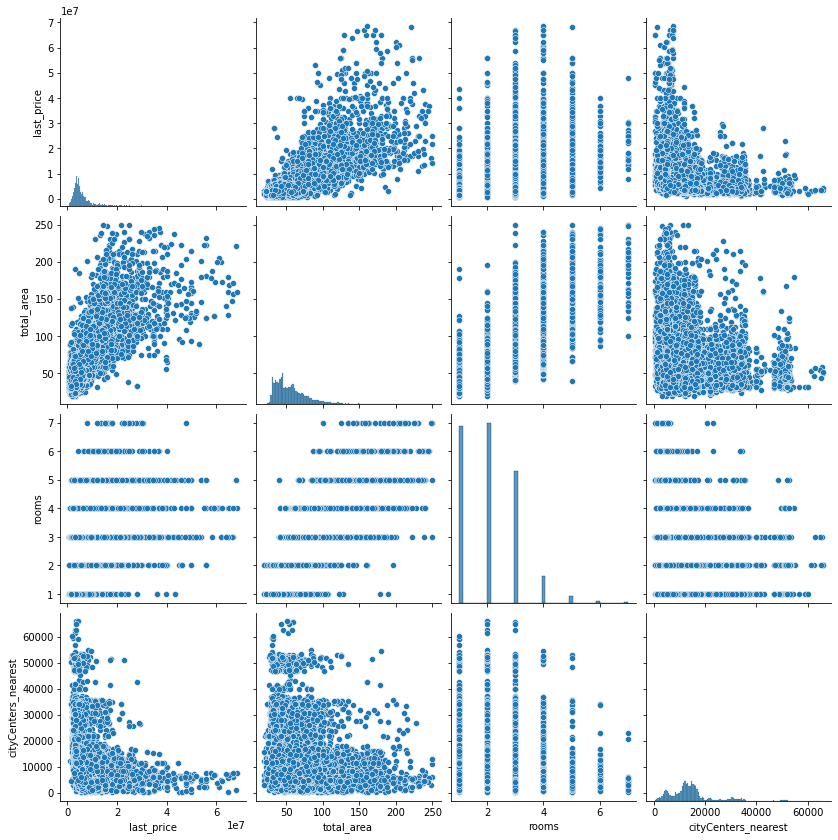

In [131]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


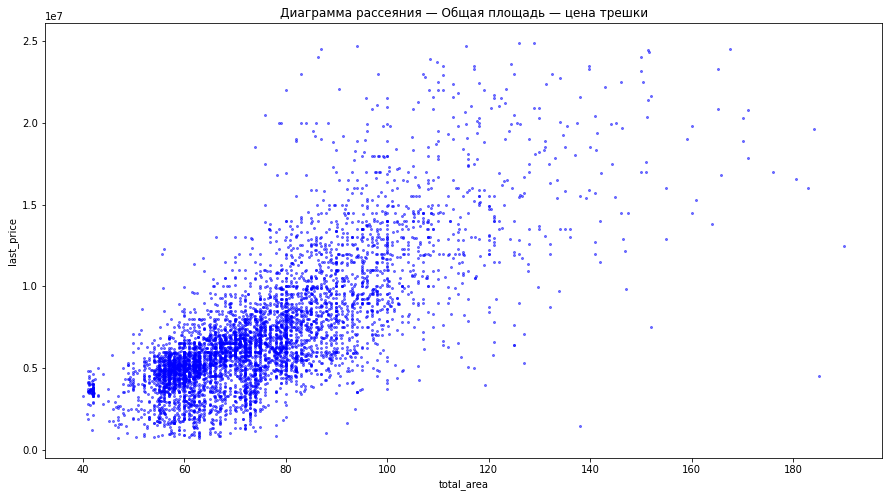

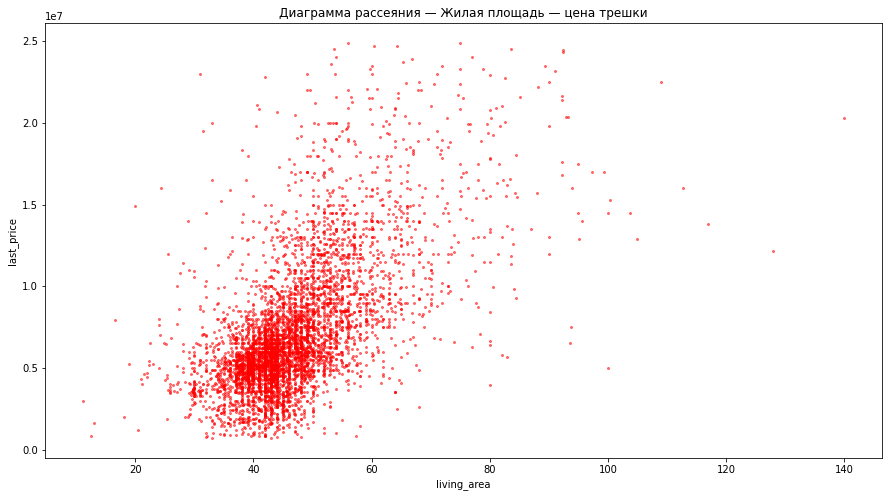

In [132]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод